In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as const
import pandas as pd


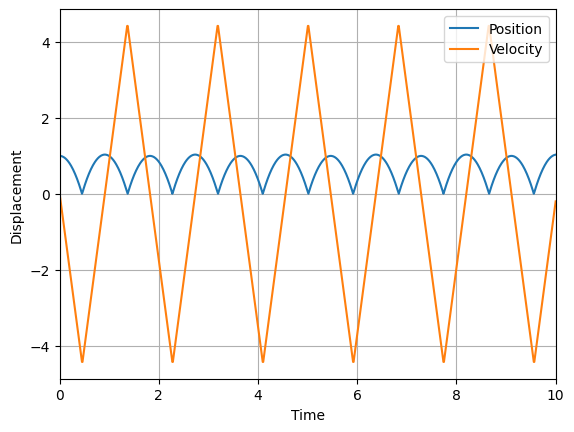

In [2]:
N = 1000
t = np.linspace(0,10,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0

def force(x):
     return -const.g * np.sign(x)

def leapfrog(x0, v0, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i])
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1])

    return x,v

x, v = leapfrog(x0, v0, dt, N)

plt.figure()
plt.plot(t, np.abs(x), label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlim(0, 10)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

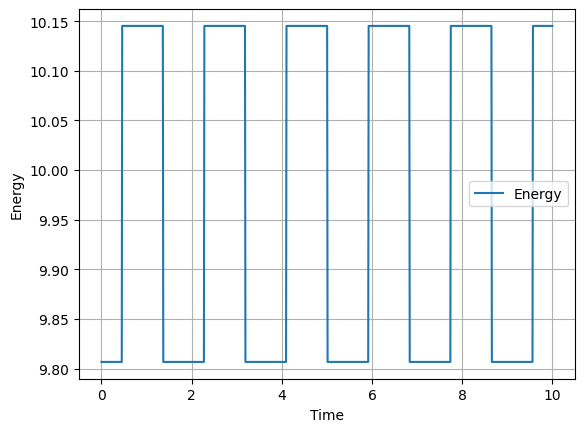

In [3]:
H = 0.5 * v **2 + const.g * np.abs(x)

plt.figure()
plt.plot(t, H, label = 'Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.grid()
plt.show()

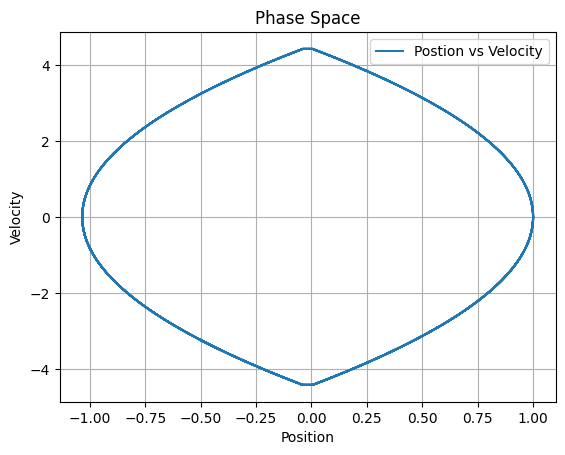

In [4]:
plt.figure()
plt.plot(x, v, label = 'Postion vs Velocity')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space')
plt.legend()
plt.grid()
plt.show()

## New Force

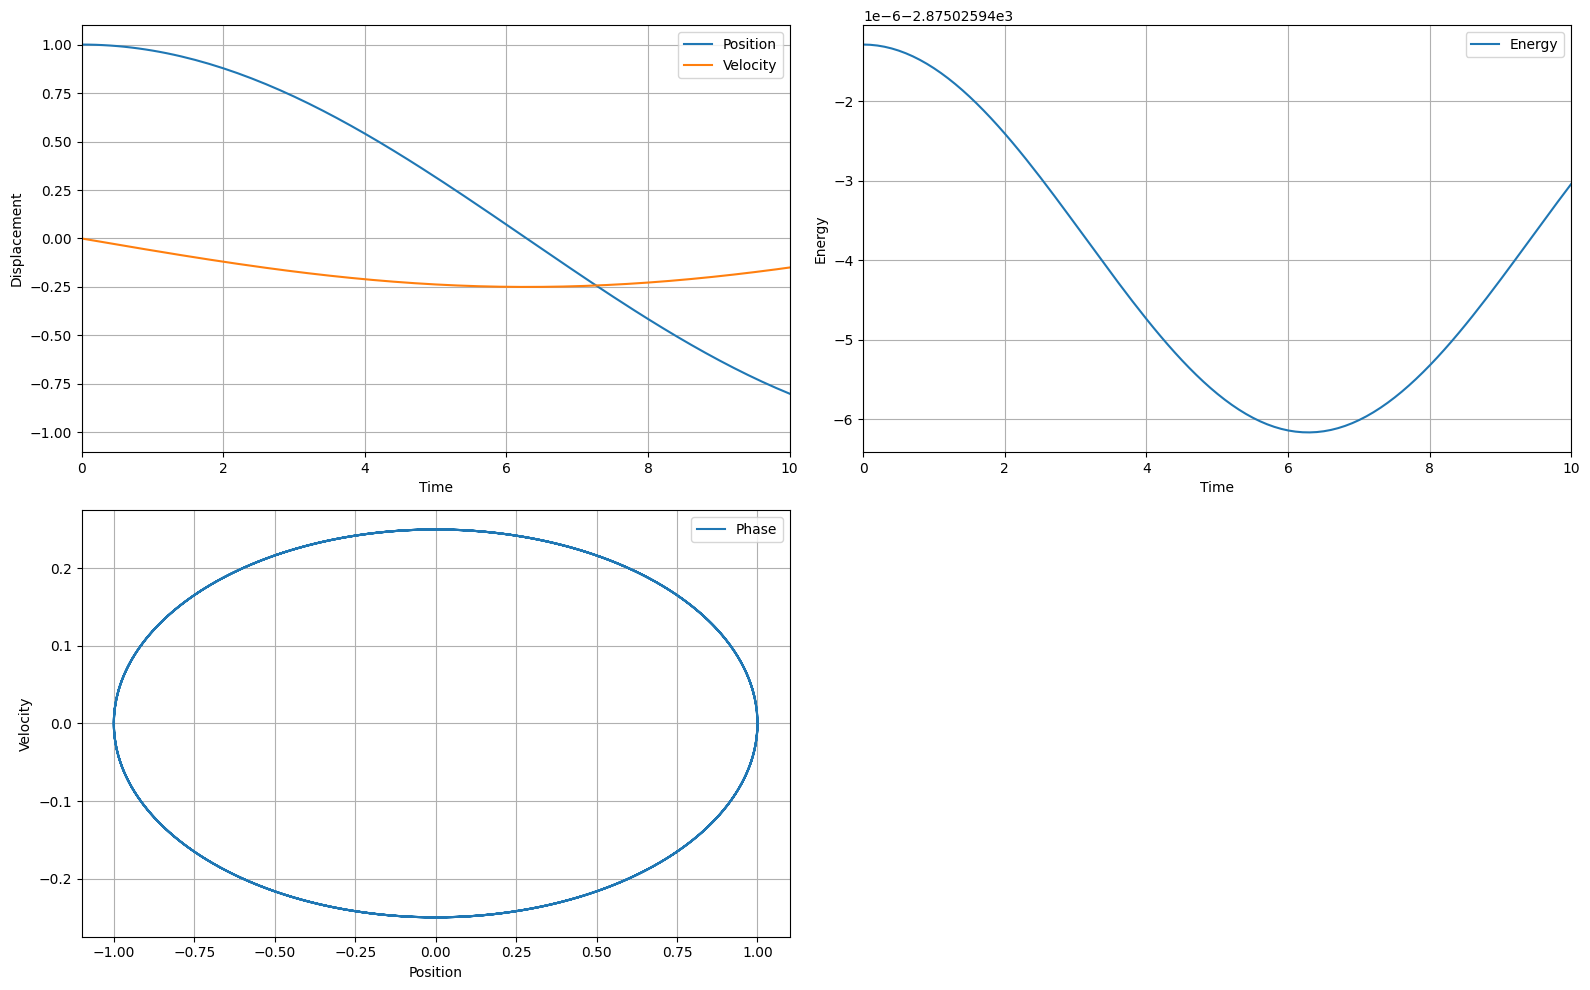

In [5]:
N = 1000
t = np.linspace(0,100,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0
x_s = 100

def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)

def leapfrog(x0, v0, x_s, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range(N-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s) 
    return x,v

x, v = leapfrog(x0, v0, x_s, dt, N)

H = 0.5 * v**2 + -const.g/np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))

plt.figure(figsize=(16, 10))

plt.subplot(2,2,1)
plt.plot(t, x, label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlim(0, 10)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()

plt.subplot(2,2,2)
plt.plot(t, H, label = 'Energy')
plt.xlabel('Time')
plt.xlim(0, 10)
plt.ylabel('Energy')
plt.legend()
plt.grid()

plt.subplot(2,2,3)
plt.plot(x, v, label = 'Phase')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Solutions Comparison

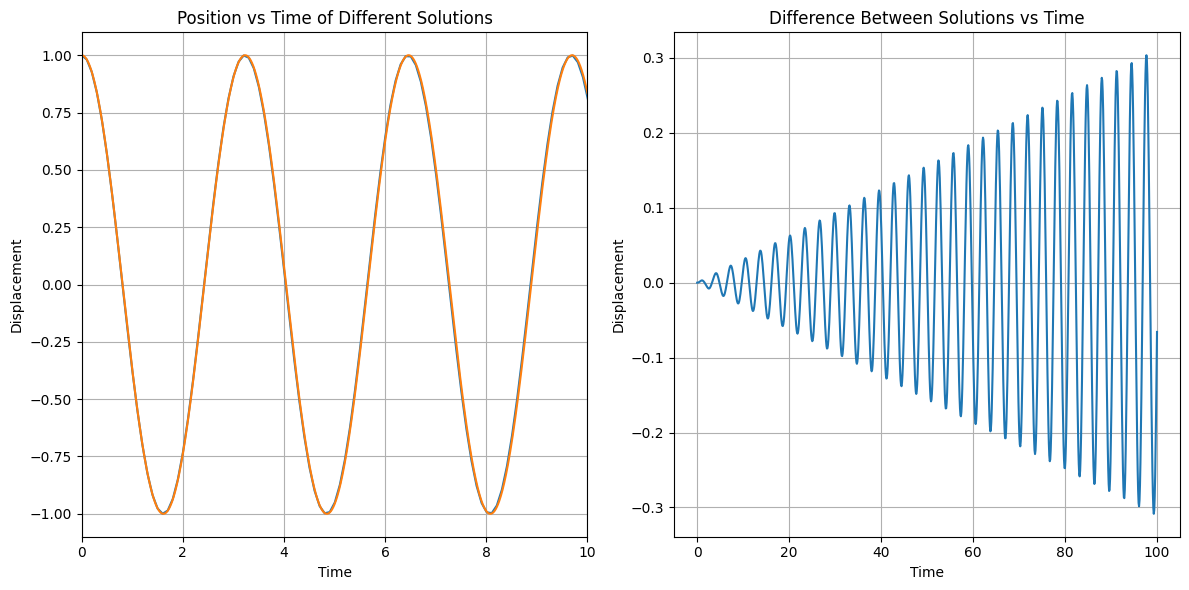

In [6]:
# Parameters
x0 = 1
v0 = 0
x_s = 1.5

def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)


def numerical_solution(x0, v0, x_s):
    N = 1000
    t = np.linspace(0,100,N) 
    dt = t[1]-t[0]
    
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return t, x, v

def estimated_analytical_solution(x0, v0, x_s):
    N = 100000
    t = np.linspace(0,100,N)
    dt = t[1]-t[0]

    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return t, x ,v

t_numerical, x_numerical, v_numerical = numerical_solution(x0, v0, x_s)
t_estimate, x_estimate, v_estimate = estimated_analytical_solution(x0, v0, x_s)

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(t_numerical, x_numerical, label = 'Numerical Position')
plt.plot(t_estimate, x_estimate, label = 'Estimated Analytic Position')
plt.xlabel('Time')
plt.xlim(0, 10)
plt.ylabel('Displacement')
plt.title('Position vs Time of Different Solutions')
plt.grid()

from scipy.interpolate import interp1d # Interpolates the data for the estimate as their is a dimensional difference for the time as it uses the different stepsizes.
x_estimate_interp = interp1d(t_estimate, x_estimate)(t_numerical)

plt.subplot(1,2,2)
plt.plot(t_numerical, x_estimate_interp - x_numerical)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Difference Between Solutions vs Time')
plt.grid()

plt.tight_layout()
plt.show()

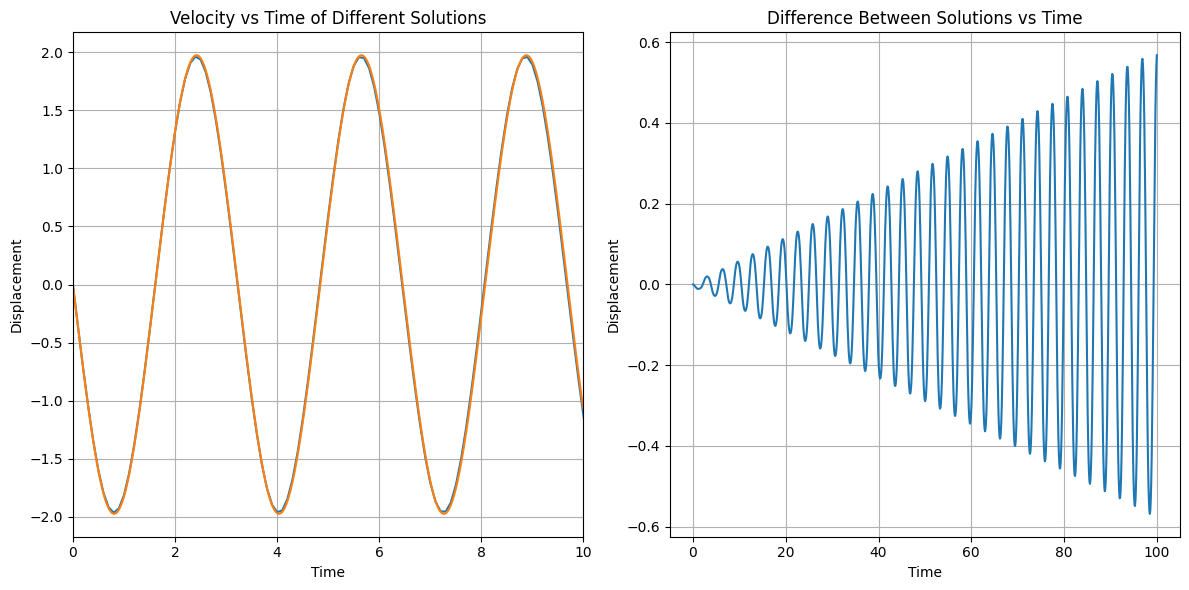

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(t_numerical, v_numerical, label = 'Numerical Velocity')
plt.plot(t_estimate, v_estimate, label = 'Estimated Analytic Velocity')
plt.xlabel('Time')
plt.xlim(0, 10)
plt.ylabel('Displacement')
plt.title('Velocity vs Time of Different Solutions')
plt.grid()

v_estimate_interp = interp1d(t_estimate, v_estimate)(t_numerical)

plt.subplot(1,2,2)
plt.plot(t_numerical, v_estimate_interp - v_numerical)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Difference Between Solutions vs Time')
plt.grid()

plt.tight_layout()
plt.show()

# Variable Step Size

0.00010000046314738041 200641
0.00012067974019987133 166260
0.00014563575932096775 137770
0.0001757510636279183 114163
0.00021209624759131076 94600
0.0002559554647449311 78390
0.00030888744574620366 64957
0.00037276531213916223 53826
0.0004498473818638269 44603
0.0005428743452444711 36960
0.0006551326626360088 30627
0.0007906096983958707 25379
0.0009541154085258646 21030
0.0011514544003380434 17426
0.0013895763505707048 14440
0.001676898698361087 11966
0.0020236099773969143 9916
0.0024420755752057456 8217
0.0029471346835914227 6809
0.0035568326406471206 5642
0.0042927028082777935 4675
0.0051805042411284296 3874
0.006252444040476911 3210
0.0075457288175593855 2660
0.009103490438244287 2205
0.010988002697639871 1827
0.013261132138724657 1514
0.016000074103580866 1255
0.019310965279971518 1040
0.023303243816365164 862
0.028140382785260036 714
0.03394939581368935 592
0.041030864879121484 490
0.04941894809332612 407
0.05971456227943574 337
0.07217299613629642 279
0.0868575451337247 232
0.10

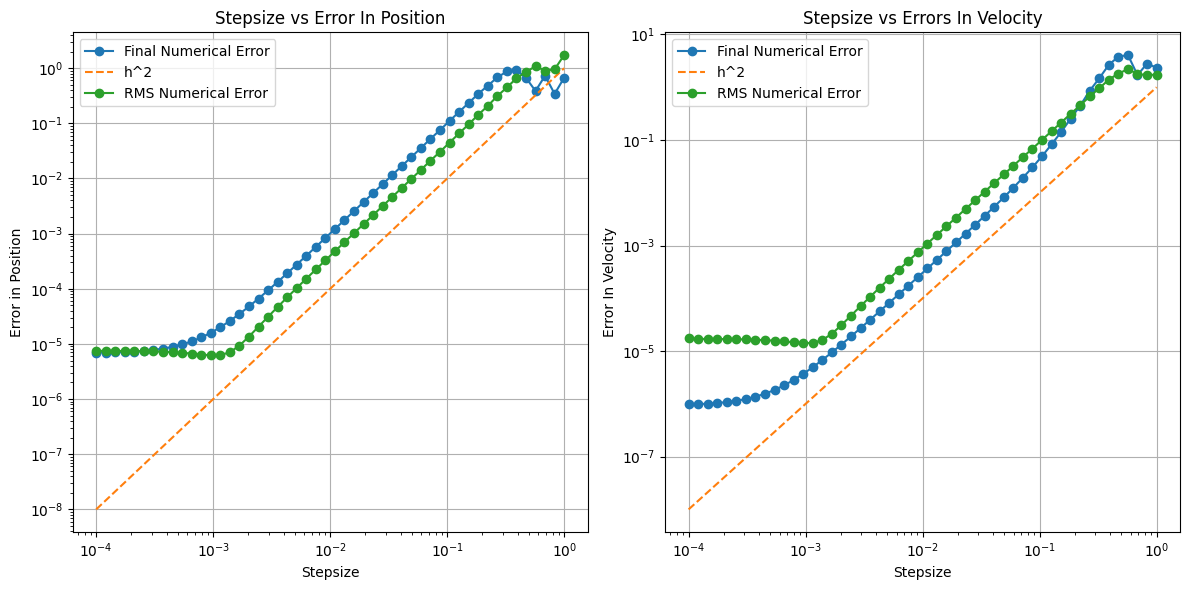

In [8]:
# Parameters
orbits = 10
x0 = 1
v0 = 0
x_s = 1
T = 2 * np.pi * np.sqrt(x0/const.g) #Time Orbit

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    dt = t_final/(h-1)
    print(dt, h)
    
    x = np.zeros(h)
    v = np.zeros(h)

    x[0] = x0
    v[0] = v0

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)

    return t, x, v


def estimated_analytical_solution(x0, v0, x_s, T, orbits):
    dt = 1e-5  #Reference Time Step
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    
    x = np.zeros(h)
    v = np.zeros(h)

    x[0] = x0
    v[0] = v0

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)

    return t, x, v

t_estimate, x_estimate, v_estimate = estimated_analytical_solution(x0, v0, x_s, T, orbits)

def find_closest_index(t_ref, t_target):
    # Find the index in t_ref that is closest to each value in t_target.
    return np.searchsorted(t_ref, t_target)

def calculate_error(stepsizes):
    final_error_position = []
    final_error_velocity = []
    rms_error_position = []
    rms_error_velocity = []
    
    for dt in stepsizes:
        t_numerical, x_numerical, v_numerical = numerical_solution(x0, v0, x_s, dt, T, orbits)

        closest_indices = find_closest_index(t_estimate, t_numerical)

        x_estimate_closest = x_estimate[closest_indices]
        v_estimate_closest = v_estimate[closest_indices]
        
        final_error_x = np.abs(x_estimate_closest - x_numerical)[-1]
        rms_error_x = np.sqrt(np.mean((x_estimate_closest - x_numerical)**2))
        final_error_position.append(final_error_x)
        rms_error_position.append(rms_error_x)

        final_error_v = np.abs(v_estimate_closest - v_numerical)[-1]
        rms_error_v = np.sqrt(np.mean((v_estimate_closest - v_numerical)**2))
        final_error_velocity.append(final_error_v)
        rms_error_velocity.append(rms_error_v)

    return final_error_position, rms_error_position, final_error_velocity, rms_error_velocity, t_numerical, x_numerical, v_numerical


# Step Sizes
stepsizes = np.logspace(-4,0,50)
final_error_position, rms_error_position, final_error_velocity, rms_error_velocity, t_numerical, x_numerical, v_numerical = calculate_error(stepsizes)

#Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(stepsizes, final_error_position, marker='o', label = 'Final Numerical Error')
plt.plot(stepsizes, np.array(stepsizes)**2, linestyle = 'dashed', label = 'h^2')
plt.plot(stepsizes, rms_error_position, marker='o', label = 'RMS Numerical Error')
plt.xlabel('Stepsize')
plt.ylabel('Error in Position')
plt.title('Stepsize vs Error In Position')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(stepsizes, final_error_velocity, marker='o', label = 'Final Numerical Error')
plt.plot(stepsizes, np.array(stepsizes)**2, linestyle = 'dashed', label = 'h^2')
plt.plot(stepsizes, rms_error_velocity, marker='o', label = 'RMS Numerical Error')
plt.xlabel('Stepsize')
plt.ylabel('Error In Velocity')
plt.title('Stepsize vs Errors In Velocity')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\thegr\AppData\Local\Temp\ipykernel_26888\3950780328.py:45: RuntimeWarning: divide by zero encountered in log
  energy_error = np.log(np.abs(energy - energy[0]))


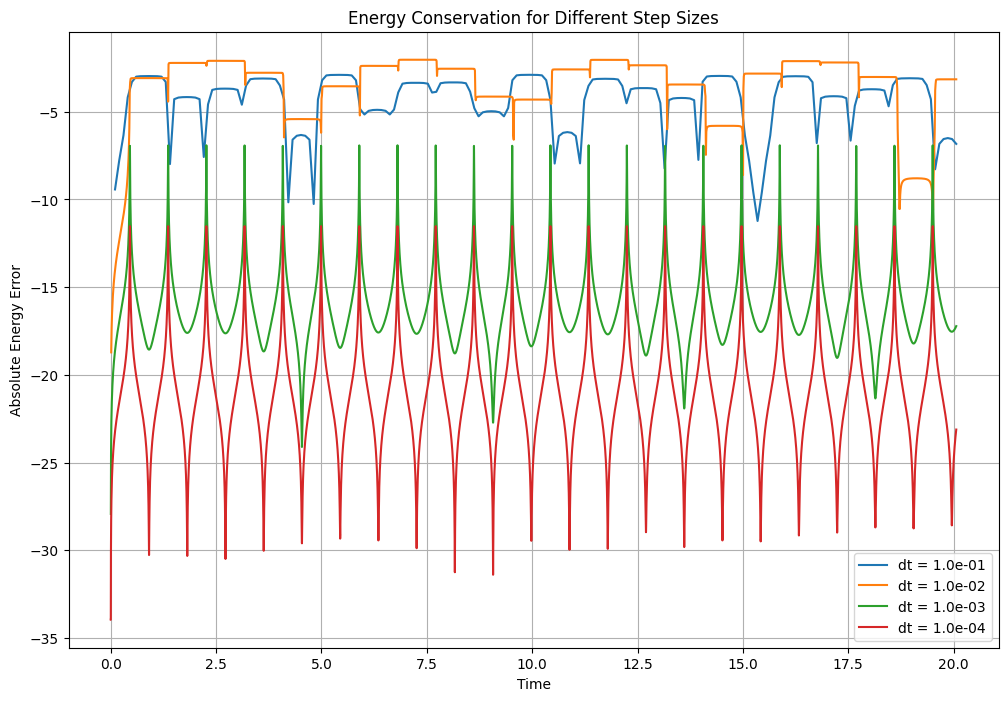

Step size: 1.0e-01
  Initial energy: 9.74e+00
  Max absolute energy error: 5.54e-02
  Mean absolute energy error: 2.52e-02

Step size: 1.0e-02
  Initial energy: 9.74e+00
  Max absolute energy error: 1.31e-01
  Mean absolute energy error: 6.34e-02

Step size: 1.0e-03
  Initial energy: 9.74e+00
  Max absolute energy error: 9.95e-04
  Mean absolute energy error: 7.77e-06

Step size: 1.0e-04
  Initial energy: 9.74e+00
  Max absolute energy error: 9.88e-06
  Mean absolute energy error: 7.76e-08



In [9]:
# Parameters
orbits = 10
x0 = 1
v0 = 0
x_s = 0.01
T = 2 * np.pi * np.sqrt(x0/const.g)  # Time per orbit

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def calculate_hamiltonian(x, v, x_s):
    kinetic = 0.5 * v**2
    potential = -const.g / np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))
    return kinetic + potential

def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    dt = t_final/(h-1)
    
    x = np.zeros(h)
    v = np.zeros(h)
    energy = np.zeros(h)

    x[0] = x0
    v[0] = v0
    energy[0] = calculate_hamiltonian(x[0], v[0], x_s)

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)
        energy[i+1] = calculate_hamiltonian(x[i+1], v[i+1], x_s)

    return t, x, v, energy

def plot_energy_conservation(stepsizes):
    plt.figure(figsize=(12, 8))
    
    for dt in stepsizes:
        t, x, v, energy = numerical_solution(x0, v0, x_s, dt, T, orbits)
        
        # Absolute Energy Error
        energy_error = np.log(np.abs(energy - energy[0]))
        
        plt.plot(t, energy_error, label=f'dt = {dt:.1e}')
    
    plt.xlabel('Time')
    plt.ylabel('Absolute Energy Error')
    plt.title('Energy Conservation for Different Step Sizes')
    plt.legend()
    plt.grid(True)
    plt.show()

def print_energy_stats(stepsizes):
    for dt in stepsizes:
        t, x, v, energy = numerical_solution(x0, v0, x_s, dt, T, orbits)
        energy_error = energy - energy[0]
        max_error = np.max(np.abs(energy_error))
        mean_error = np.mean(np.abs(energy_error))
        print(f"Step size: {dt:.1e}")
        print(f"  Initial energy: {energy[0]:.2e}")
        print(f"  Max absolute energy error: {max_error:.2e}")
        print(f"  Mean absolute energy error: {mean_error:.2e}")
        print()

stepsizes = [1e-1, 1e-2, 1e-3, 1e-4]
plot_energy_conservation(stepsizes)
print_energy_stats(stepsizes)

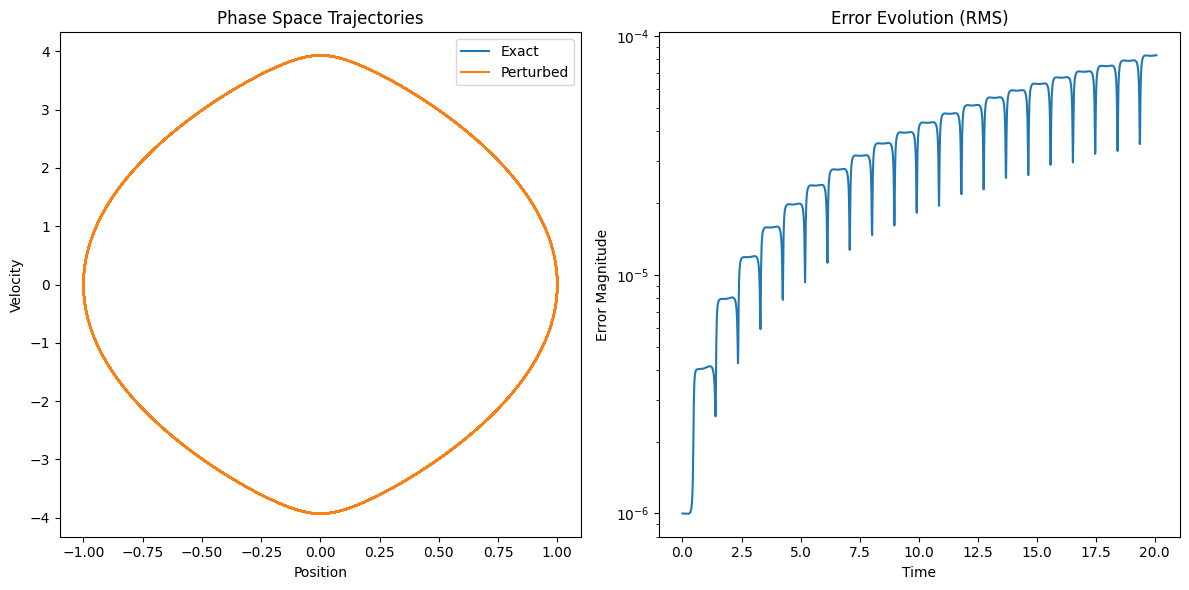

In [10]:
# Parameters
orbits = 10
x0 = 1
v0 = 0
x_s = 0.1
T = 2 * np.pi * np.sqrt(x0/const.g)  # Time per orbit

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def calculate_hamiltonian(x, v, x_s):
    kinetic = 0.5 * v**2
    potential = -const.g / np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))
    return kinetic + potential

def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    dt = t_final/(h-1)
    
    x = np.zeros(h)
    v = np.zeros(h)
    energy = np.zeros(h)

    x[0] = x0
    v[0] = v0
    energy[0] = calculate_hamiltonian(x[0], v[0], x_s)

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)
        energy[i+1] = calculate_hamiltonian(x[i+1], v[i+1], x_s)

    return t, x, v, energy


def phase_space_error(x0, v0, x_s, dt, orbits):
    t, x_exact, v_exact, _ = numerical_solution(x0, v0, x_s, dt, T, orbits)
    t, x_approx, v_approx, _ = numerical_solution(x0 + 1e-6, v0, x_s, dt, T, orbits)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(x_exact, v_exact, label='Exact')
    plt.plot(x_approx, v_approx, label='Perturbed')
    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.title('Phase Space Trajectories')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(t, np.sqrt((x_exact - x_approx)**2 + (v_exact - v_approx)**2))
    plt.xlabel('Time')
    plt.ylabel('Error Magnitude')
    plt.title('Error Evolution (RMS)')
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

phase_space_error(x0, v0, x_s, 0.01, 10)

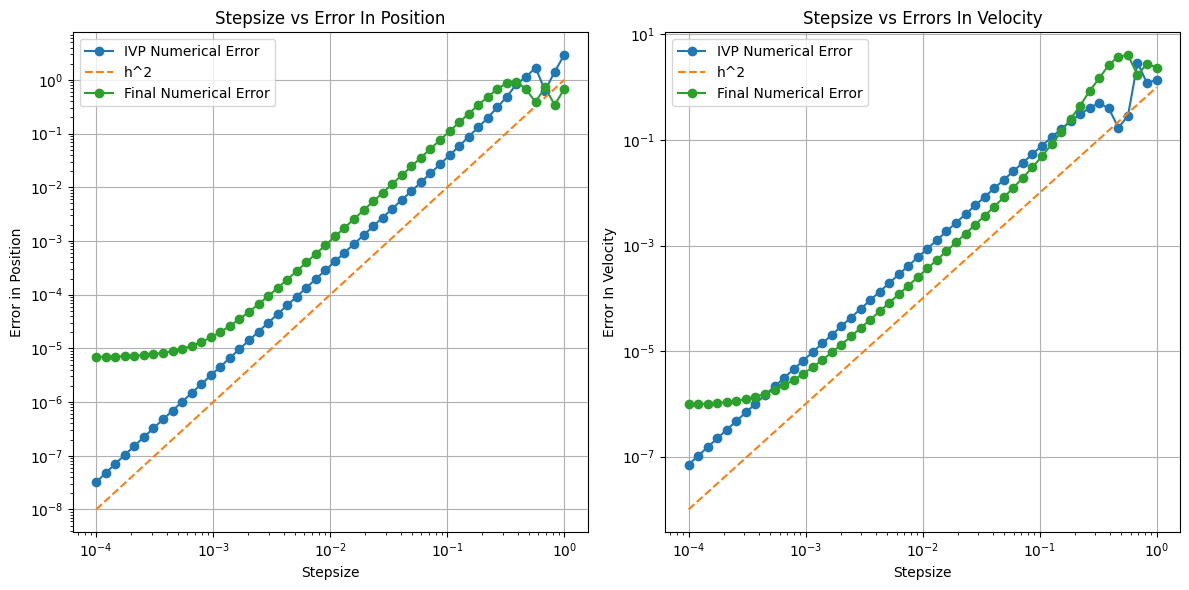

In [11]:
from scipy.integrate import solve_ivp

# Parameters
orbits = 5
x0 = 1
v0 = 0
x_s = 1
T = 2 * np.pi * np.sqrt(x0/const.g)  # Time Orbit

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    dt = t_final/(h-1)
    
    x = np.zeros(h)
    v = np.zeros(h)
    x[0] = x0
    v[0] = v0
    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)
    return t, x, v

def system(t, y, x_s):
    x, v = y
    return [v, force(x, x_s)]

def ivp_solution(x0, v0, x_s, T, orbits):
    t_span = (0, orbits * T)
    y0 = [x0, v0]
    sol = solve_ivp(system, t_span, y0, args=(x_s,), method='RK45', rtol=1e-10, atol=1e-10)
    return sol.t, sol.y[0], sol.y[1]

def find_closest_index(t_ref, t_target):
    return np.searchsorted(t_ref, t_target)

def calculate_error(stepsizes):
    t_ref, x_ref, v_ref = ivp_solution(x0, v0, x_s, T, orbits)
    
    ivp_error_position = []
    ivp_error_velocity = []
    
    for dt in stepsizes:
        t_numerical, x_numerical, v_numerical = numerical_solution(x0, v0, x_s, dt, T, orbits)
        closest_indices = find_closest_index(t_ref, t_numerical)
        x_ref_closest = x_ref[closest_indices]
        v_ref_closest = v_ref[closest_indices]
        
        error_x = np.abs(x_ref_closest - x_numerical)[-1]
        ivp_error_position.append(error_x)
        error_v = np.abs(v_ref_closest - v_numerical)[-1]
        ivp_error_velocity.append(error_v)
    
    return ivp_error_position, ivp_error_velocity, t_numerical, x_numerical, v_numerical

# Step Sizes
stepsizes = np.logspace(-4, 0, 50)
ivp_error_position, ivp_error_velocity, t_numerical, x_numerical, v_numerical = calculate_error(stepsizes)

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(stepsizes, ivp_error_position, marker='o', label='IVP Numerical Error')
plt.plot(stepsizes, np.array(stepsizes)**2, linestyle='dashed', label='h^2')
plt.plot(stepsizes, final_error_position, marker='o', label = 'Final Numerical Error')
plt.xlabel('Stepsize')
plt.ylabel('Error in Position')
plt.title('Stepsize vs Error In Position')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(stepsizes, ivp_error_velocity, marker='o', label='IVP Numerical Error')
plt.plot(stepsizes, np.array(stepsizes)**2, linestyle='dashed', label='h^2')
plt.plot(stepsizes, final_error_velocity, marker='o', label = 'Final Numerical Error')
plt.xlabel('Stepsize')
plt.ylabel('Error In Velocity')
plt.title('Stepsize vs Errors In Velocity')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

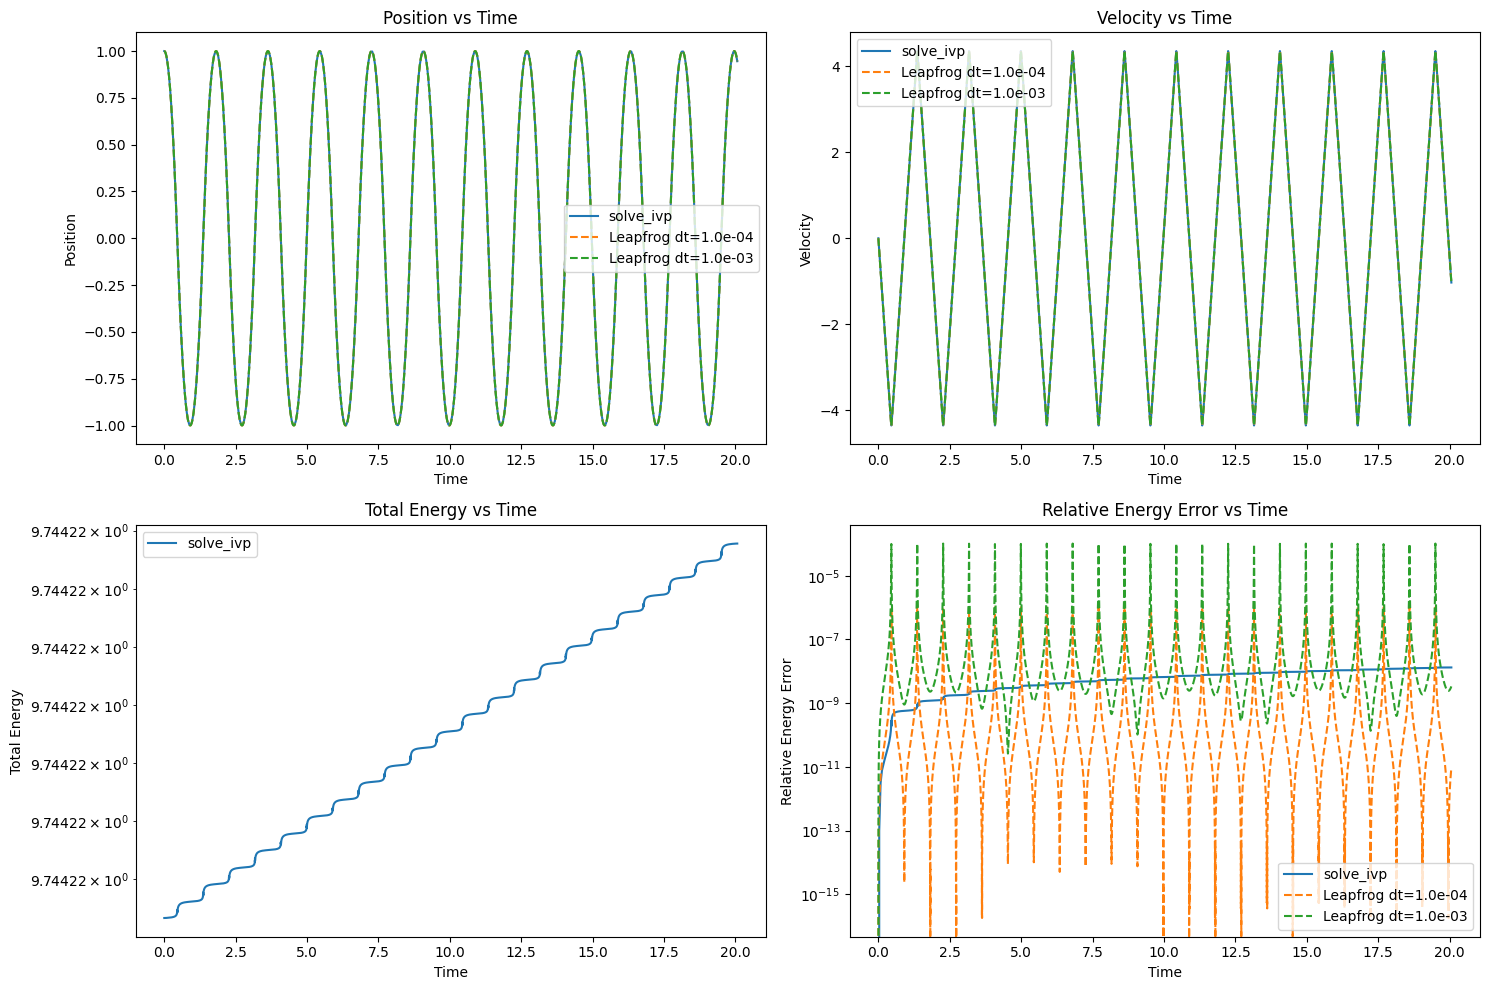

In [12]:
# Parameters
orbits = 10
x0 = 1
v0 = 0
x_s = 0.01
T = 2 * np.pi * np.sqrt(x0/const.g)  # Time Orbit

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def total_energy(x, v, x_s):
    potential = -const.g / np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))
    kinetic = 0.5 * v**2
    energy = kinetic + potential
    return energy

def system(t, y, x_s):
    x, v = y
    return [v, force(x, x_s)]

def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    
    x = np.zeros(h)
    v = np.zeros(h)
    energy = np.zeros(h)
    x[0] = x0
    v[0] = v0
    energy[0] = total_energy(x[0], v[0], x_s)
    
    for i in range(h-1):
        if x[i] * x[i+1] < 0:
            v[i+1] = -(x[i] + x[i+1])/(x[i+1]-x[i]) * dt * 0.5 * force(x[i], x_s)
            x[i+1] = x[i] + dt * v[i+1]
            v[i+1] = (x[i+1]+x[i])/(x[i+1]-x[i]) * dt * 0.5 * force(x[i], x_s)
            energy[i+1] = total_energy(x[i+1], v[i+1], x_s)
        else:
            v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
            x[i+1] = x[i] + dt * v[i+1]
            v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s) 
            energy[i+1] = total_energy(x[i+1], v[i+1], x_s)
    
    return t, x, v, energy

def ivp_solution(x0, v0, x_s, T, orbits):
    t_span = (0, orbits * T)
    y0 = [x0, v0]
    sol = solve_ivp(system, t_span, y0, args=(x_s,), method='RK45', rtol=1e-10, atol=1e-10)
    energy = total_energy(sol.y[0], sol.y[1], x_s)
    return sol.t, sol.y[0], sol.y[1], energy

t_ivp, x_ivp, v_ivp, e_ivp = ivp_solution(x0, v0, x_s, T, orbits)

stepsizes = np.logspace(-4, -3, 2)
leapfrog_results = [numerical_solution(x0, v0, x_s, dt, T, orbits) for dt in stepsizes]

# Plotting
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(t_ivp, x_ivp, label='solve_ivp')
for i, (t, x, _, _) in enumerate(leapfrog_results):
    plt.plot(t, x, label=f'Leapfrog dt={stepsizes[i]:.1e}', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position vs Time')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t_ivp, v_ivp, label='solve_ivp')
for i, (t, _, v, _) in enumerate(leapfrog_results):
    plt.plot(t, v, label=f'Leapfrog dt={stepsizes[i]:.1e}', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity vs Time')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t_ivp, e_ivp, label='solve_ivp')
# for i, (t, _, _, e) in enumerate(leapfrog_results):
#       plt.plot(t, e, label=f'Leapfrog dt={stepsizes[i]:.1e}', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.yscale("log")
plt.title('Total Energy vs Time')
plt.legend()

plt.subplot(2, 2, 4)
e_ivp_error = np.abs(e_ivp - e_ivp[0]) / e_ivp[0]
plt.semilogy(t_ivp, e_ivp_error, label='solve_ivp')
for i, (t, _, _, e) in enumerate(leapfrog_results):
    e_error = np.abs(e - e[0]) / e[0]
    plt.semilogy(t, e_error, label=f'Leapfrog dt={stepsizes[i]:.1e}', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Relative Energy Error')
plt.title('Relative Energy Error vs Time')
plt.legend()

plt.tight_layout()
plt.show()

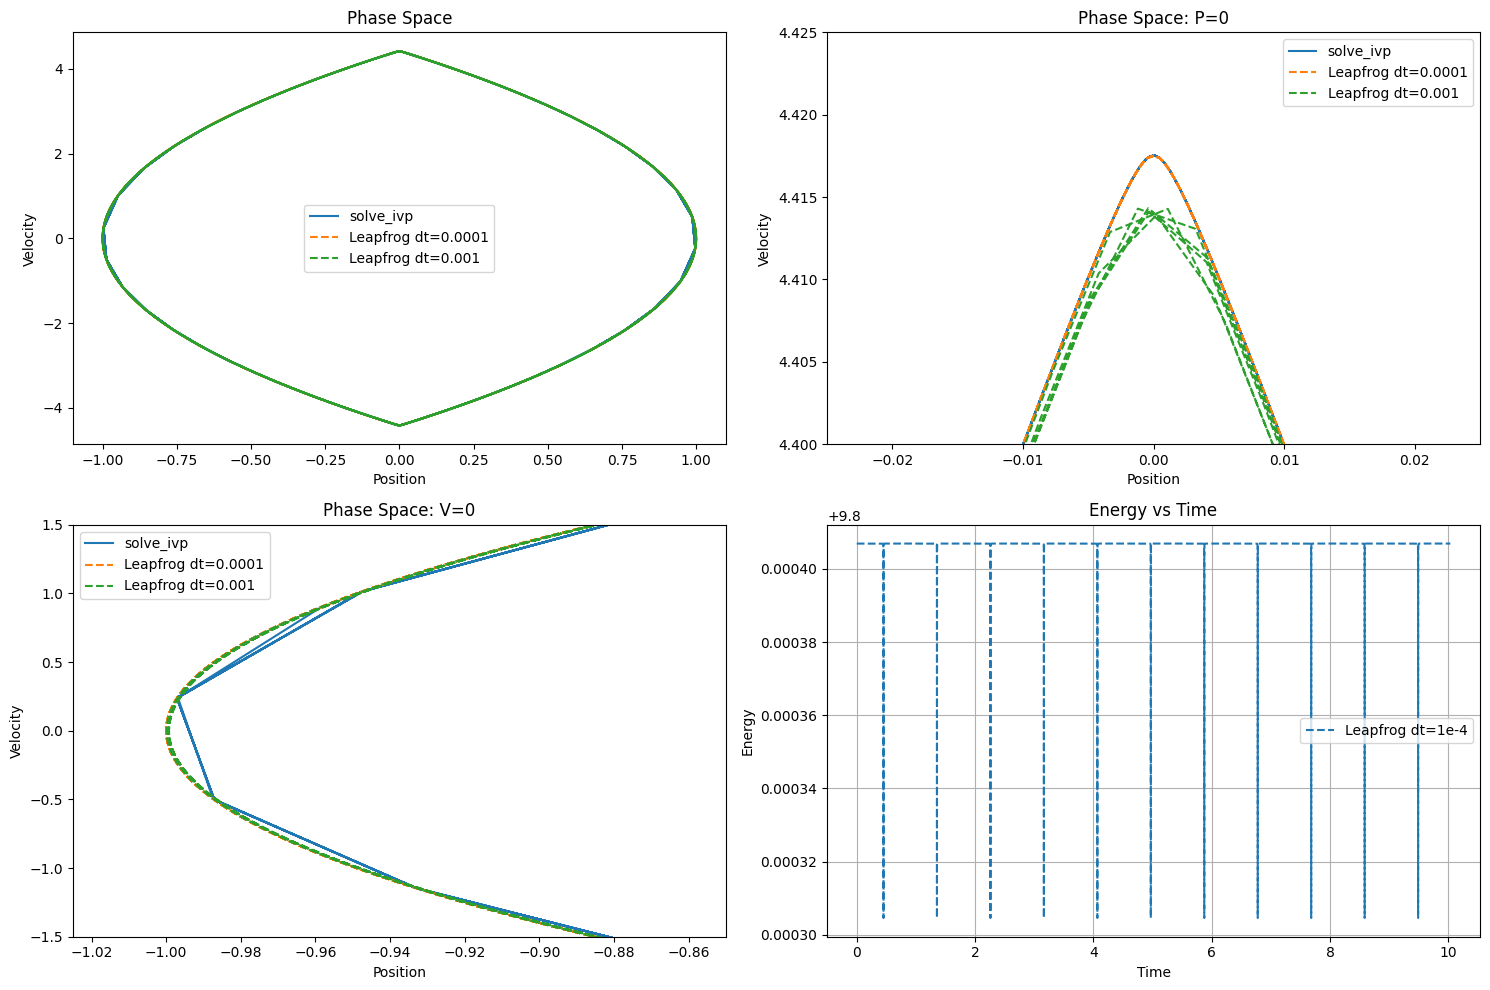

In [13]:
# Parameters
orbits = 5
x0 = 1
v0 = 0
x_s = 0.001

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def total_energy(x, v, x_s):
    potential = -const.g / np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))
    kinetic = 0.5 * v**2
    return kinetic + potential

def system(t, y, x_s):
    x, v = y
    return [v, force(x, x_s)]

def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    
    x = np.zeros(h)
    v = np.zeros(h)
    energy = np.zeros(h)
    x[0] = x0
    v[0] = v0
    energy[0] = total_energy(x[0], v[0], x_s)
    
    for i in range(h-1):
        if x[i] * x[i+1] < 0:
            v[i+1] = -(x[i] + x[i+1])/(x[i+1]-x[i]) * dt * 0.5 * force(x[i], x_s)
            x[i+1] = x[i] + dt * v[i+1]
            v[i+1] = (x[i+1]+x[i])/(x[i+1]-x[i]) * dt * 0.5 * force(x[i], x_s)
        else:
            v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
            x[i+1] = x[i] + dt * v[i+1]
            v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s) 

        energy[i+1] = total_energy(x[i+1], v[i+1], x_s)

    return t, x, v, energy

def ivp_solution(x0, v0, x_s, T, orbits):
    t_span = (0, orbits * T)
    y0 = [x0, v0]
    sol = solve_ivp(system, t_span, y0, args=(x_s,), method='RK45', rtol=1e-10, atol=1e-10)
    return sol.t, sol.y[0], sol.y[1]

# Compute solutions
t_ivp, x_ivp, v_ivp = ivp_solution(x0, v0, x_s, T, orbits)
stepsizes = [1e-4, 1e-3]
leapfrog_results = [numerical_solution(x0, v0, x_s, dt, T, orbits) for dt in stepsizes]

# Plotting
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.plot(x_ivp, v_ivp, label='solve_ivp')
for i, (_, x, v, _) in enumerate(leapfrog_results):
     plt.plot(x, v, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space')
plt.legend()

plt.subplot(2,2,2)
plt.plot(x_ivp, v_ivp, label='solve_ivp')
for i, (_, x, v, _) in enumerate(leapfrog_results):
     plt.plot(x, v, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.xlim(-0.025,0.025)
plt.ylim(4.4,4.425)
plt.title('Phase Space: P=0')
plt.legend()

plt.subplot(2,2,3)
plt.plot(x_ivp, v_ivp, label='solve_ivp')
for i, (_, x, v, _) in enumerate(leapfrog_results):
     plt.plot(x, v, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.xlim(-1.025,-0.85)
plt.ylim(-1.5,1.5)
plt.title('Phase Space: V=0')
plt.legend()

plt.subplot(2,2,4)
t, _, _, energy = leapfrog_results[0]  # First result is dt=1e-4
plt.plot(t, energy, label='Leapfrog dt=1e-4', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy vs Time')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

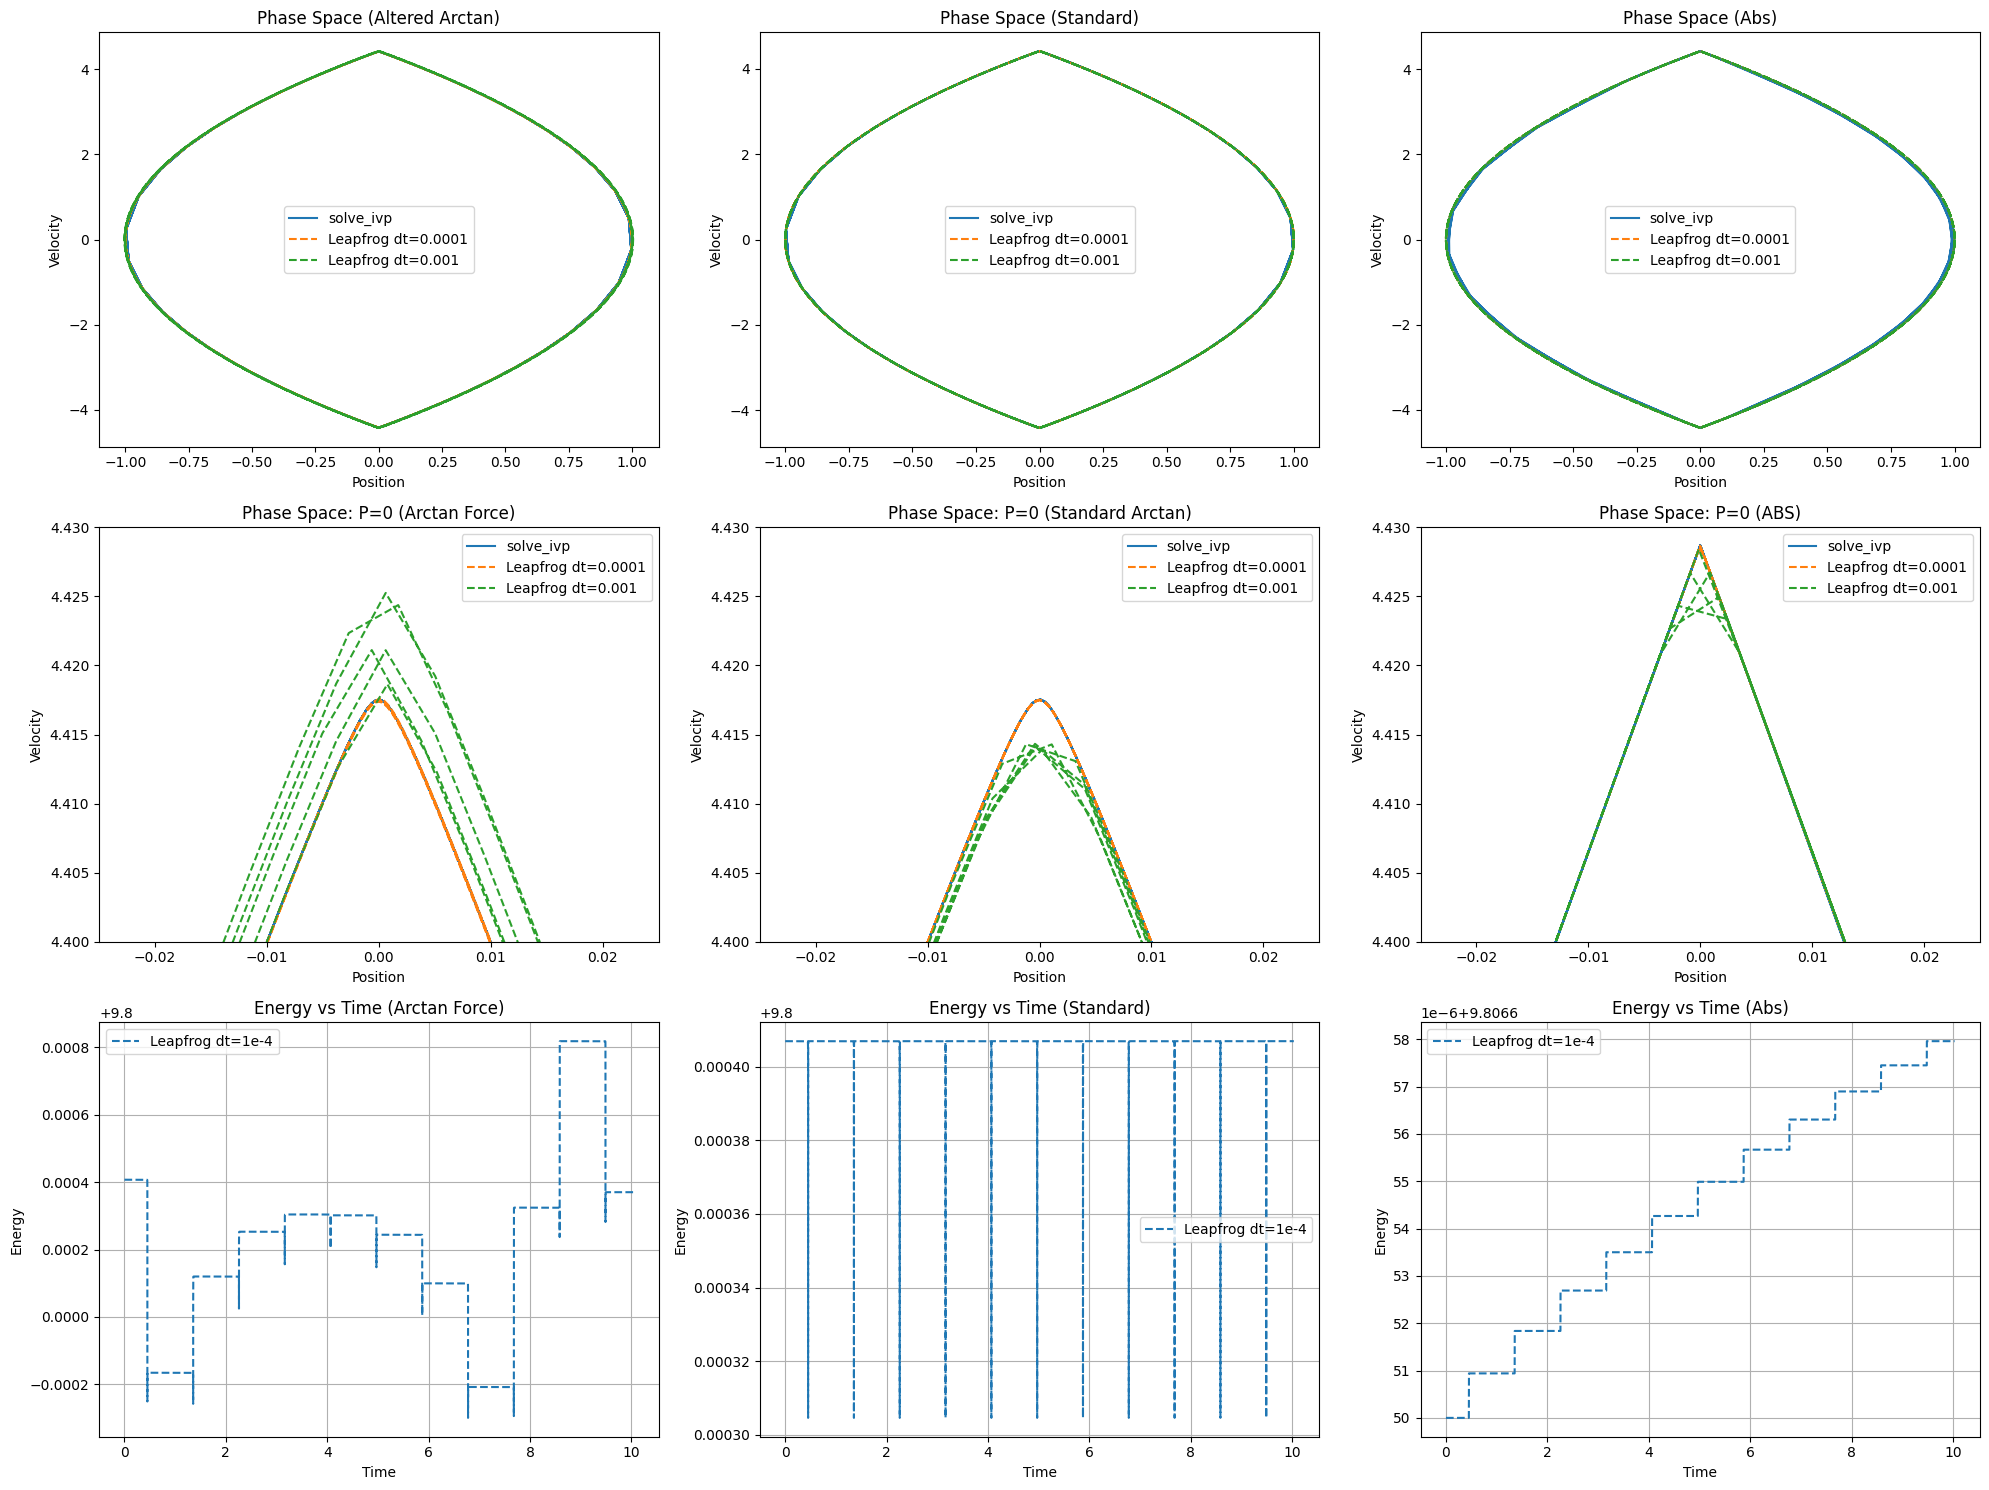

In [14]:
# Parameters
orbits = 5
x0 = 1
v0 = 0
T = 2 * np.pi * np.sqrt(x0/const.g) 
x_s = 0.001

# Force and energy functions
def create_force_arctan(x_s):
    return lambda x: -const.g * 2/np.pi * np.arctan(x/x_s)

def create_force_abs():
    return lambda x: -const.g * np.sign(x)

force_arctan = create_force_arctan(x_s)
force_abs = create_force_abs()

def total_energy_arctan(x, v, x_s):
    potential = -const.g / np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))
    kinetic = 0.5 * v**2
    return kinetic + potential

def total_energy_abs(x, v):
    potential = const.g * np.abs(x)
    kinetic = 0.5 * v**2
    return kinetic + potential

# System functions for solve_ivp
def system_arctan(t, y):
    x, v = y
    return [v, force_arctan(x)]

def system_abs(t, y):
    x, v = y
    return [v, force_abs(x)]

# Numerical System Computing
def numerical_solution_arctan(x0, v0, x_s, force_arctan, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)

    x = np.zeros(h)
    v = np.zeros(h)
    energy = np.zeros(h)

    x[0] = x0
    v[0] = v0
    energy[0] = total_energy_arctan(x[0], v[0], x_s)
    
    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force_arctan(x[i])
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force_arctan(x[i+1])
        if x[i] * x[i+1] < 0:
            v[i+1] += -(x[i] + x[i+1])/(x[i+1]-x[i]) * dt * 0.5 * force_arctan(x[i])
            v[i+1] += (x[i+1]+x[i])/(x[i+1]-x[i]) * dt * 0.5 * force_arctan(x[i+1])
        energy[i+1] = total_energy_arctan(x[i+1], v[i+1],x_s)
    return t, x, v, energy

def numerical_solution_abs(x0, v0, force_abs, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)

    x = np.zeros(h)
    v = np.zeros(h)
    energy = np.zeros(h)

    x[0] = x0
    v[0] = v0
    energy[0] = total_energy_abs(x[0], v[0])
    
    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force_abs(x[i])
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force_abs(x[i+1])
        if x[i] * x[i+1] < 0:
            v[i+1] += -(x[i] + x[i+1])/(x[i+1]-x[i]) * dt * 0.5 * force_abs(x[i])
            v[i+1] += (x[i+1]+x[i])/(x[i+1]-x[i]) * dt * 0.5 * force_abs(x[i+1])
        energy[i+1] = total_energy_abs(x[i+1], v[i+1])
    return t, x, v, energy

def standard_leapfrog(x0, v0, force_arctan, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    x = np.zeros(h)
    v = np.zeros(h)
    energy = np.zeros(h)
    x[0] = x0
    v[0] = v0
    energy[0] = total_energy_arctan(x[0], v[0], x_s)
    
    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force_arctan(x[i])
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force_arctan(x[i+1])
        energy[i+1] = total_energy_arctan(x[i+1], v[i+1], x_s)
    return t, x, v, energy

# Compute solutions
sol_arctan = solve_ivp(system_arctan, (0, orbits * T), [x0, v0], method='RK45', rtol=1e-10, atol=1e-10, max_step= dt)                      
t_ivp_arctan, x_ivp_arctan, v_ivp_arctan = sol_arctan.t, sol_arctan.y[0], sol_arctan.y[1]

sol_abs = solve_ivp(system_abs, (0, orbits * T), [x0, v0], method='RK45', rtol=1e-10, atol=1e-10, max_step = dt, )
t_ivp_abs, x_ivp_abs, v_ivp_abs = sol_abs.t, sol_abs.y[0], sol_abs.y[1]

stepsizes = [1e-4, 1e-3]
leapfrog_results_arctan = [numerical_solution_arctan(x0, v0, x_s, force_arctan, dt, T, orbits) for dt in stepsizes]
leapfrog_results_abs = [numerical_solution_abs(x0, v0, force_abs, dt, T, orbits) for dt in stepsizes]
leapfrog_standard = [standard_leapfrog(x0, v0, force_arctan, dt, T, orbits) for dt in stepsizes]

# Plotting
plt.figure(figsize=(20, 15))

#Arctan Plots
plt.subplot(3,3,1)
plt.plot(x_ivp_arctan, v_ivp_arctan, label='solve_ivp')
for i, (_, x, v, _) in enumerate(leapfrog_results_arctan):
    plt.plot(x, v, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space (Altered Arctan)')
plt.legend()

plt.subplot(3,3,4)
plt.plot(x_ivp_arctan, v_ivp_arctan, label='solve_ivp')
for i, (_, x, v, _) in enumerate(leapfrog_results_arctan):
    plt.plot(x, v, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.xlim(-0.025,0.025)
plt.ylim(4.40,4.430)
plt.title('Phase Space: P=0 (Arctan Force)')
plt.legend()

plt.subplot(3,3,7)
t, _, _, energy = leapfrog_results_arctan[0]
plt.plot(t, energy, label='Leapfrog dt=1e-4', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy vs Time (Arctan Force)')
plt.grid()
plt.legend()

#Standard Plots
plt.subplot(3,3,2)
plt.plot(x_ivp_arctan, v_ivp_arctan, label='solve_ivp')
for i, (_, x, v, _) in enumerate(leapfrog_standard):
    plt.plot(x, v, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space (Standard)')
plt.legend()

plt.subplot(3,3,5)
plt.plot(x_ivp_arctan, v_ivp_arctan, label='solve_ivp')
for i, (_, x, v, _) in enumerate(leapfrog_standard):
    plt.plot(x, v, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.xlim(-0.025,0.025)
plt.ylim(4.40,4.430)
plt.title('Phase Space: P=0 (Standard Arctan)')
plt.legend()

plt.subplot(3,3,8)
t, _, _, energy = leapfrog_standard[0]
plt.plot(t, energy, label='Leapfrog dt=1e-4', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy vs Time (Standard)')
plt.grid()
plt.legend()

#Abs Plot
plt.subplot(3,3,3)
plt.plot(x_ivp_abs, v_ivp_abs, label='solve_ivp')
for i, (_, x, v, _) in enumerate(leapfrog_results_abs):
    plt.plot(x, v, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space (Abs)')
plt.legend()

plt.subplot(3,3,6)
plt.plot(x_ivp_abs, v_ivp_abs, label='solve_ivp')
for i, (_, x, v, _) in enumerate(leapfrog_results_abs):
    plt.plot(x, v, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.xlim(-0.025,0.025)
plt.ylim(4.40,4.430)
plt.title('Phase Space: P=0 (ABS)')
plt.legend()

plt.subplot(3,3,9)
t, _, _, energy = leapfrog_results_abs[0]
plt.plot(t, energy, label='Leapfrog dt=1e-4', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy vs Time (Abs)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
def analyze_bounce_dynamics(x0, v0, x_s, force_fn, dt, T, orbits, force_type="arctan", method="corrected"):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    
    bounce_data = []
    x = np.zeros(h)
    v = np.zeros(h)
    x[0] = x0
    v[0] = v0
    
    if force_type == "arctan":
        energy_fn = lambda x, v: total_energy_arctan(x, v, x_s)
    else:
        energy_fn = lambda x, v: total_energy_abs(x, v)
    
    bounce_count = 0
    
    for i in range(h-1):
        v_original = v[i]
        e_original = energy_fn(x[i], v[i])
        
        # Standard leapfrog step
        v_temp = v[i] + 0.5 * dt * force_fn(x[i])
        x[i+1] = x[i] + dt * v_temp
        v[i+1] = v_temp + 0.5 * dt * force_fn(x[i+1])
        
        #Standard Solution
        if x[i] * x[i+1] < 0:
            bounce_count += 1
            if bounce_count <= 10:
                if method == "standard":
                    bounce_data.append({
                        'bounce': bounce_count,
                        'dx': x[i+1] - x[i],
                        'dv': v[i+1] - v_original,
                        'dE': energy_fn(x[i+1], v[i+1]) - e_original,
                        'dt': dt
                    })
                    #Corrected Solutions 
                else:
                    v_after_kick1 = v[i+1] - (x[i] + x[i+1])/(x[i+1]-x[i]) * dt * 0.5 * force_fn(x[i])
                    v_final = v_after_kick1 + (x[i+1]+x[i])/(x[i+1]-x[i]) * dt * 0.5 * force_fn(x[i+1])
                    
                    bounce_data.append({
                        'bounce': bounce_count,
                        'dx': x[i+1] - x[i],
                        'dv_kick1': v_after_kick1 - v[i+1],
                        'dv_kick2': v_final - v_after_kick1,
                        'dv_total': v_final - v_original,
                        'dE_kick1': energy_fn(x[i+1], v_after_kick1) - e_original,
                        'dE_kick2': energy_fn(x[i+1], v_final) - energy_fn(x[i+1], v_after_kick1),
                        'dE_total': energy_fn(x[i+1], v_final) - e_original,
                        'dv_bounce': v_final - v_original,
                        'dE_bounce': energy_fn(x[i+1], v_final) - e_original,
                        'dt': dt
                    })
                    v[i+1] = v_final
            
    return pd.DataFrame(bounce_data)

def format_summary(standard_df, corrected_df, force_type, dt):
    print(f"\nAnalysis for {force_type}_dt_{dt}:")
    
    # Header lines
    print("       |{:^44}|{:^142}".format("Standard Method", "Corrected Method"))
    print("       |" + "-" * 44 + "|" + "-" * 126 + "|")
    print("       |{:>14}{:>14}{:>14}  |{:>14}{:>14}{:>14}{:>14}{:>14}{:>14}{:>14}{:>14}{:>14}|".format(
        "dx", "dv", "dE", "dx", "dv_kick1", "dv_kick2", "dv_total", "dv_bounce", 
        "dE_kick1", "dE_kick2", "dE_total", "dE_bounce"))
    print("       |" + "-" * 44 + "|" + "-" * 126 + "|")
    
    # Format number to maintain consistent width and precision
    def format_num(x):
        return f"{x:14.6e}"
    
    # Combine and print results with consistent spacing
    for bounce in range(1, 11):
        std_row = standard_df[standard_df['bounce'] == bounce].iloc[0] if bounce <= len(standard_df) else None
        cor_row = corrected_df[corrected_df['bounce'] == bounce].iloc[0] if bounce <= len(corrected_df) else None
        
        if std_row is not None and cor_row is not None:
            print(f"{int(std_row['bounce']):6d} | "
                  f"{format_num(std_row['dx'])}{format_num(std_row['dv'])}{format_num(std_row['dE'])} |"
                  f"{format_num(cor_row['dx'])}{format_num(cor_row['dv_kick1'])}{format_num(cor_row['dv_kick2'])}"
                  f"{format_num(cor_row['dv_total'])}{format_num(cor_row['dv_bounce'])}{format_num(cor_row['dE_kick1'])}"
                  f"{format_num(cor_row['dE_kick2'])}{format_num(cor_row['dE_total'])}{format_num(cor_row['dE_bounce'])}|")
    print("\n")


#Parameters
orbits = 10
x0 = 1
v0 = 0
T = 2 * np.pi * np.sqrt(x0/const.g)
x_s = 0.001

# Force functions
force_arctan = create_force_arctan(x_s)
force_abs = create_force_abs()

#Stepsizes
stepsizes = [1e-4, 1e-3]
results = {}

for dt in stepsizes:
    # Standard leapfrog analysis
    results[f'standard_arctan_dt_{dt}'] = analyze_bounce_dynamics(
        x0, v0, x_s, force_arctan, dt, T, orbits, "arctan", "standard"
    )
    
    results[f'standard_abs_dt_{dt}'] = analyze_bounce_dynamics(
        x0, v0, x_s, force_abs, dt, T, orbits, "abs", "standard"
    )
    
    # Corrected leapfrog analysis
    results[f'arctan_dt_{dt}'] = analyze_bounce_dynamics(
        x0, v0, x_s, force_arctan, dt, T, orbits, "arctan", "corrected"
    )
    
    results[f'abs_dt_{dt}'] = analyze_bounce_dynamics(
        x0, v0, x_s, force_abs, dt, T, orbits, "abs", "corrected"
    )

print(f"\nDetailed Bounce Analysis at x_s = {x_s}:")

for dt in stepsizes:
    # Arctan force comparison
    format_summary(
        results[f'standard_arctan_dt_{dt}'],
        results[f'arctan_dt_{dt}'],
        'arctan',
        dt
    )
    
    # Abs force comparison
    format_summary(
        results[f'standard_abs_dt_{dt}'],
        results[f'abs_dt_{dt}'],
        'abs',
        dt
    )


Detailed Bounce Analysis at x_s = 0.001:

Analysis for arctan_dt_0.0001:
       |              Standard Method               |                                                               Corrected Method                                                               
       |--------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|
       |            dx            dv            dE  |            dx      dv_kick1      dv_kick2      dv_total     dv_bounce      dE_kick1      dE_kick2      dE_total     dE_bounce|
       |--------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|
     1 |  -4.417506e-04  1.295096e-04  1.710717e-05 | -4.417506e-04  1.837740e-07  1.293472e-04  2.590406e-04  2.590406e-04  1.629537e-05 -5.713671e-04 -5.550717e-04 -5.550717e-04|
     2

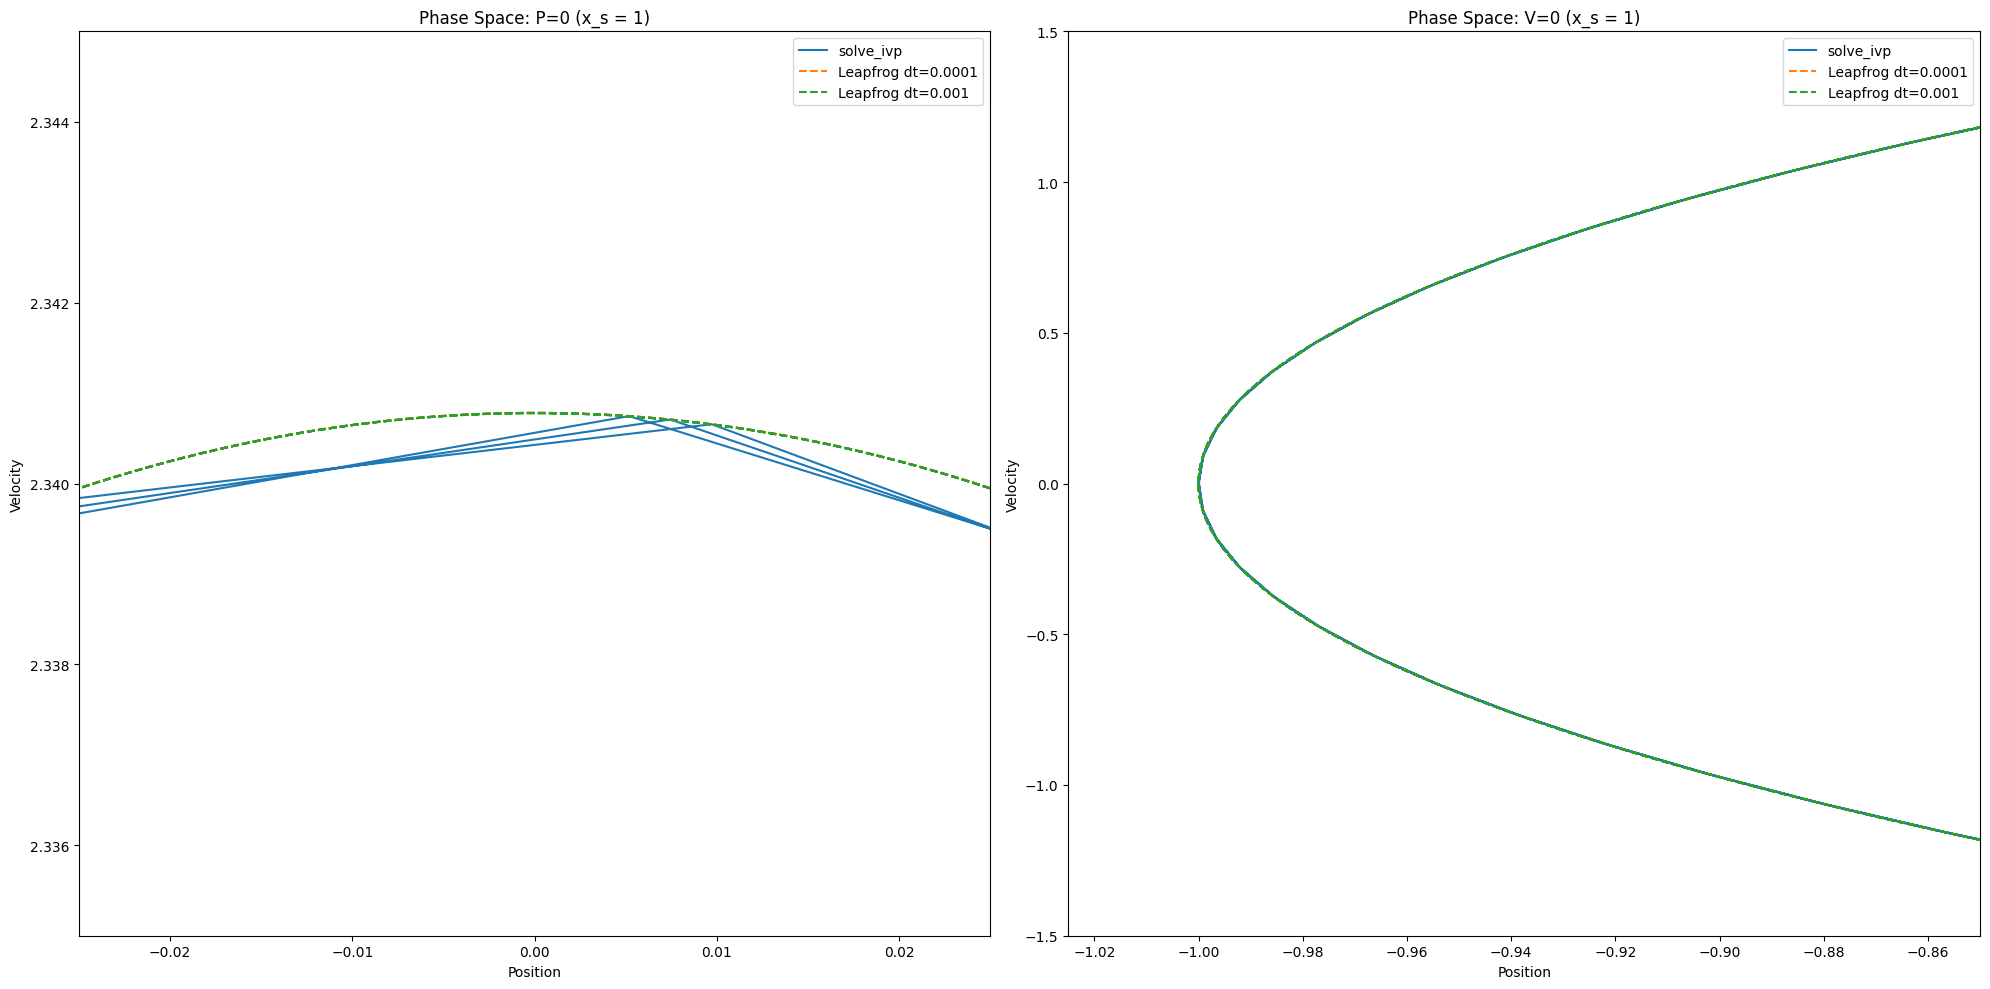

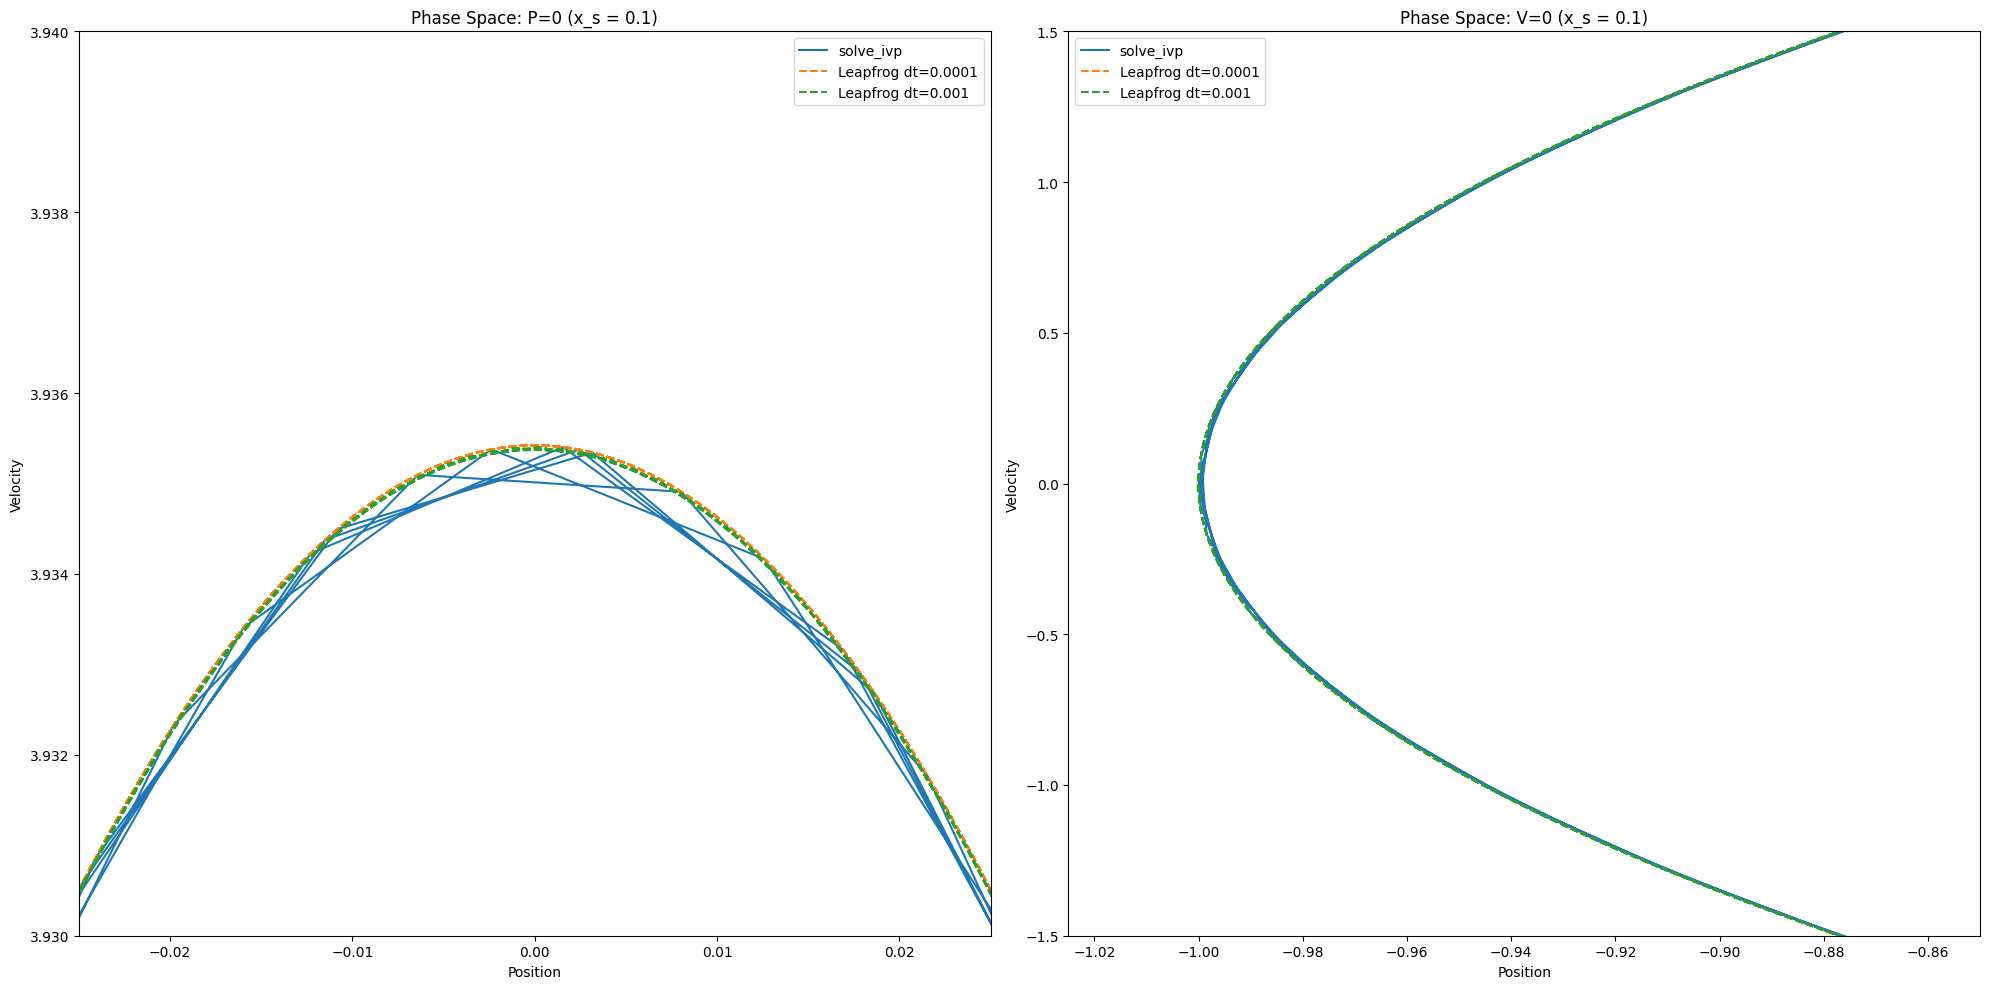

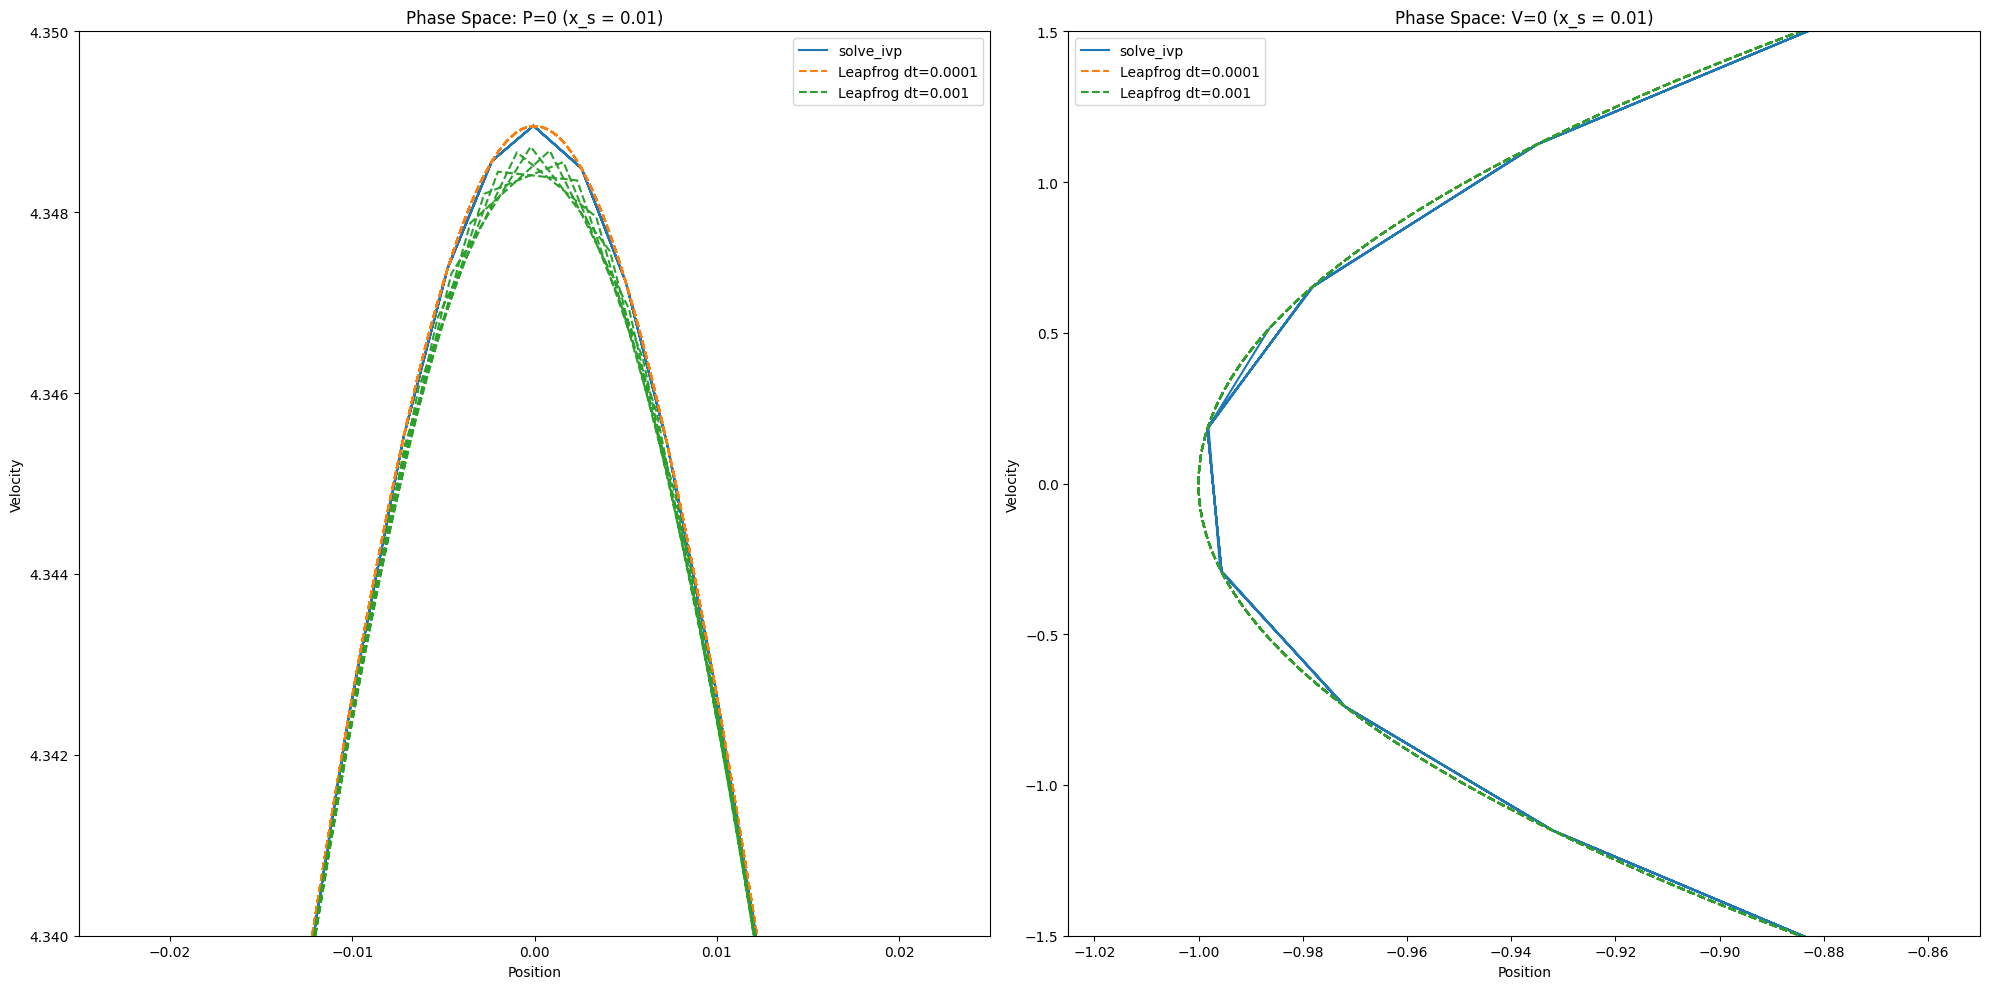

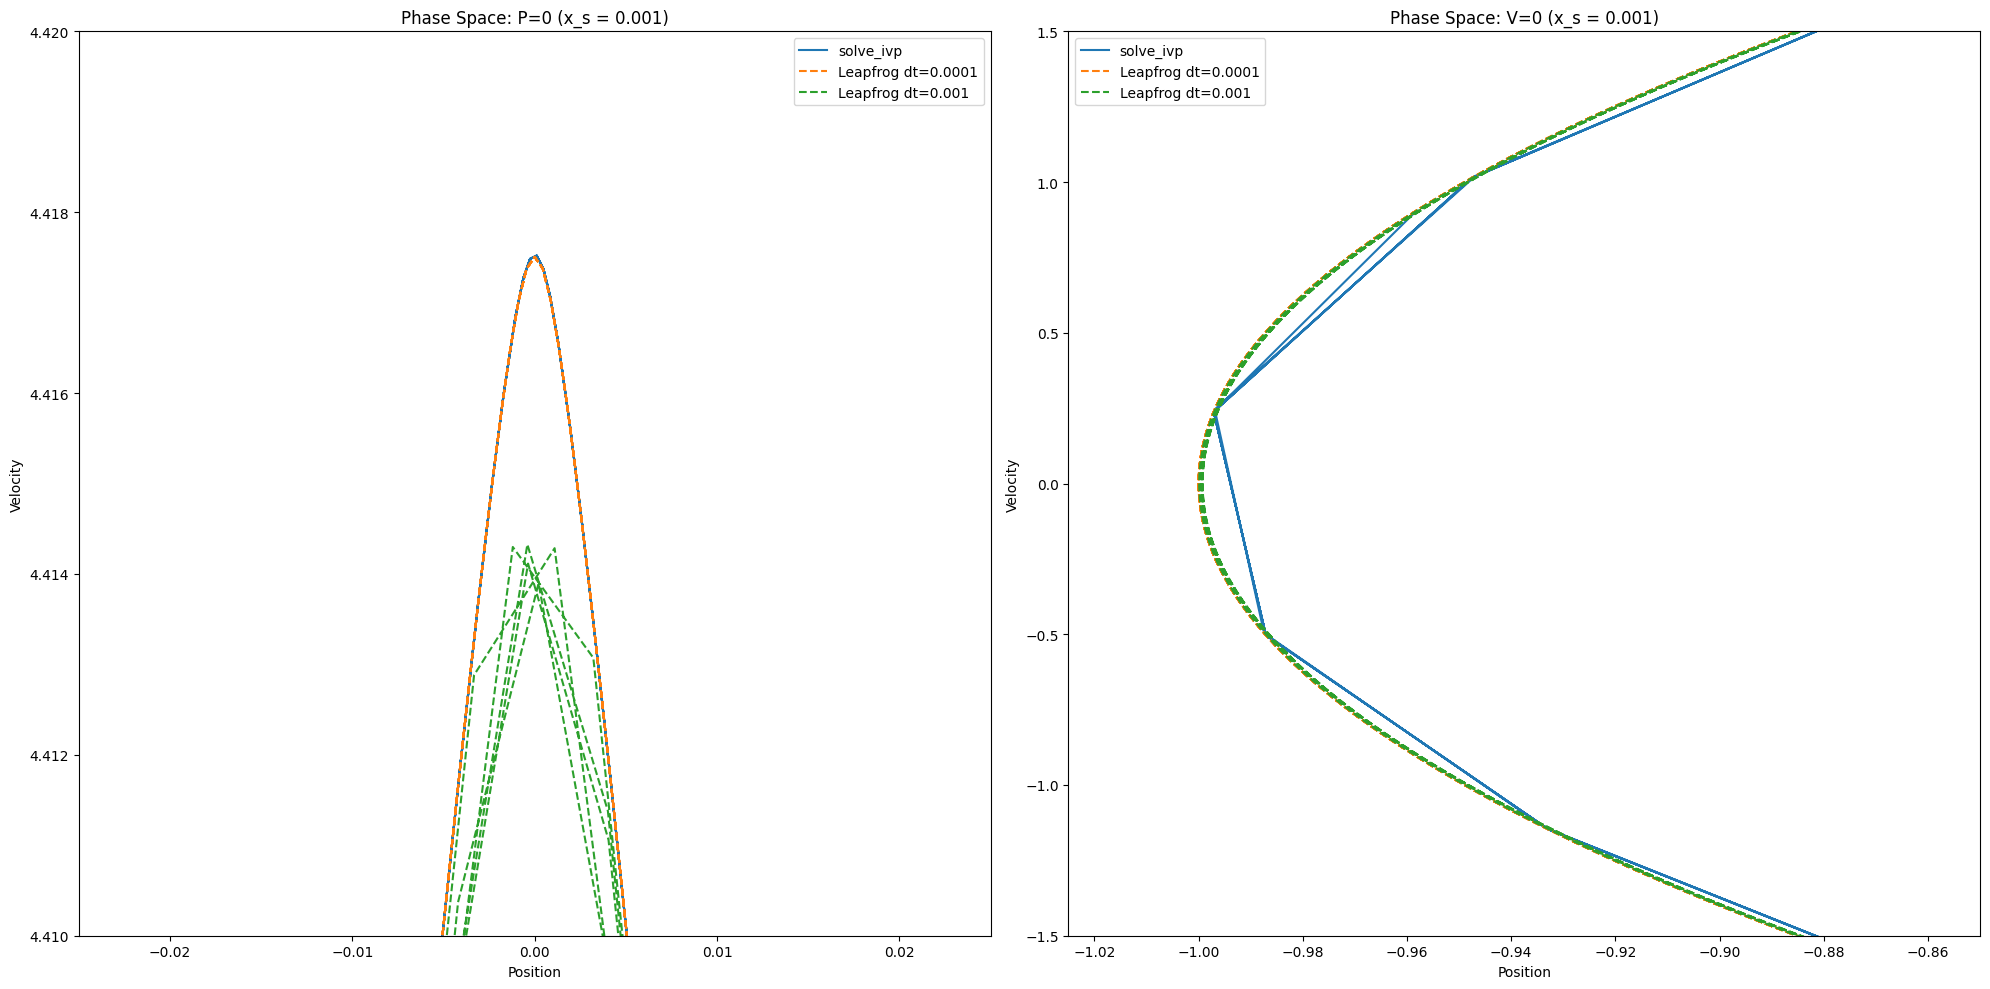

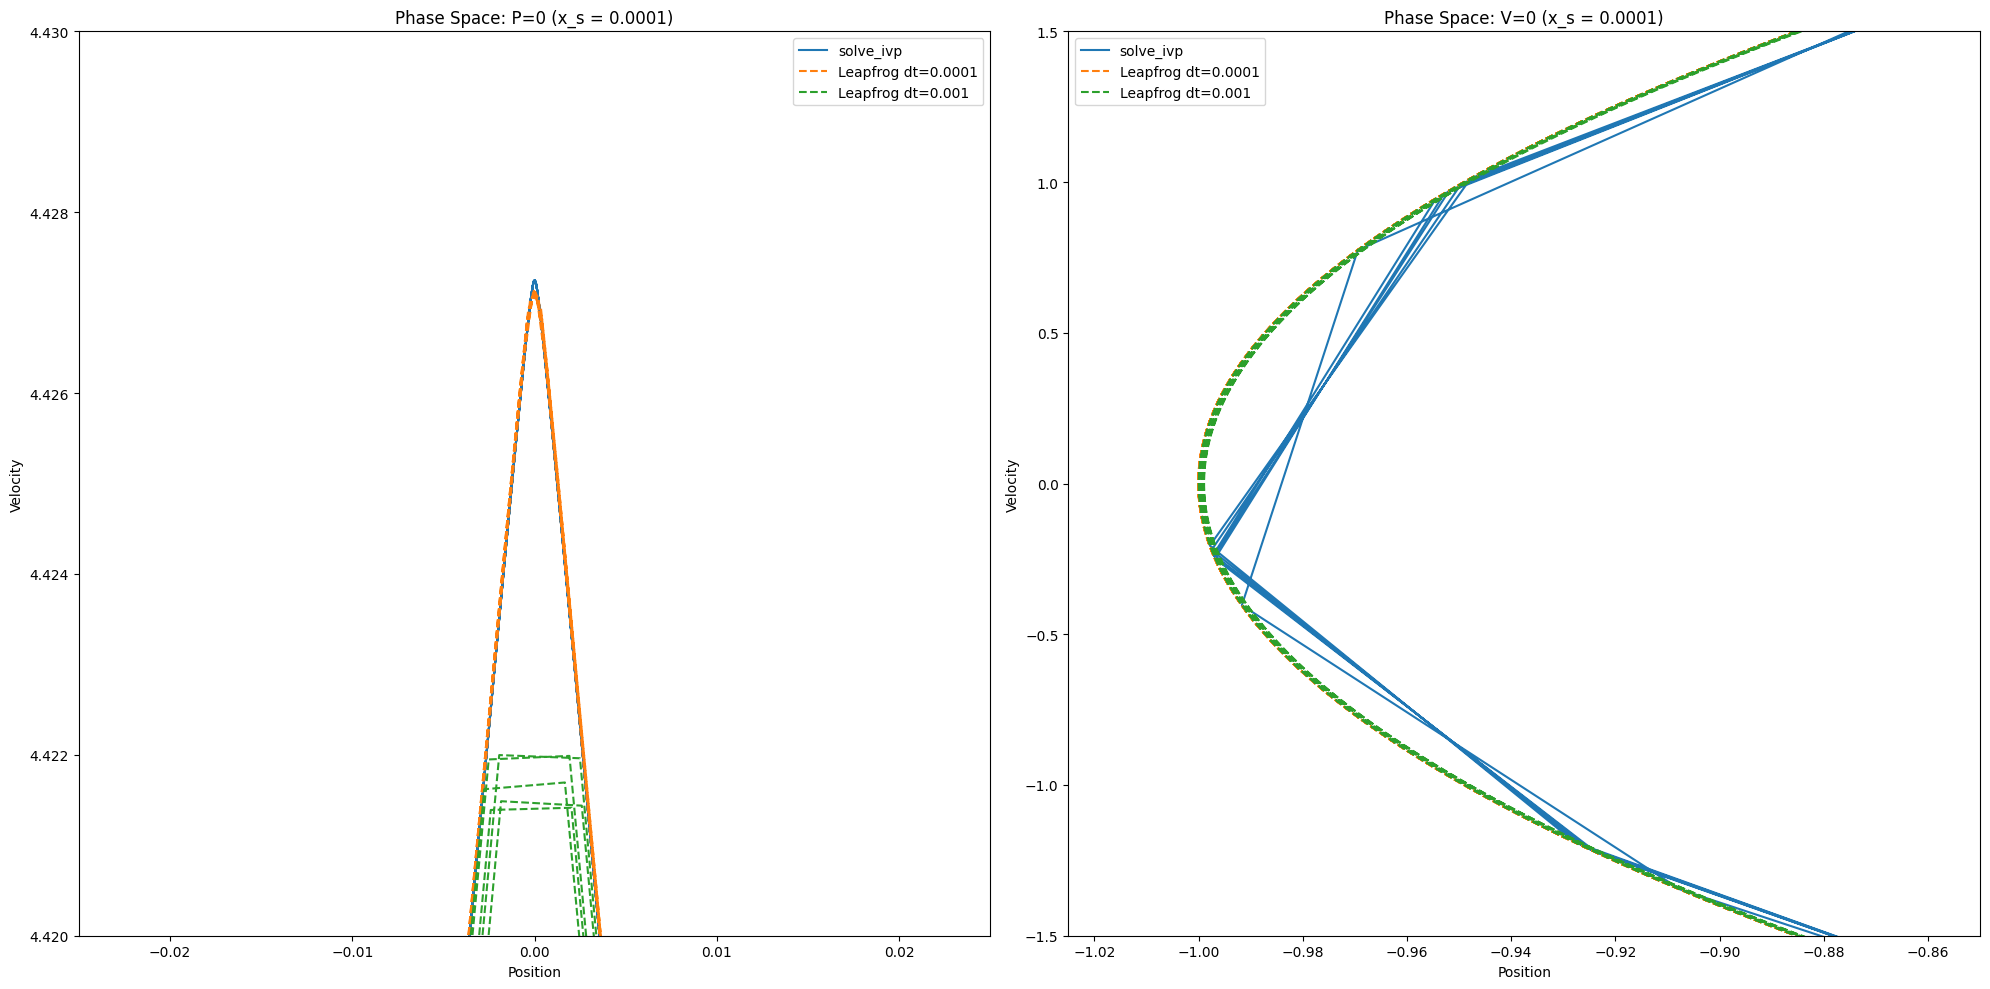

In [16]:
# Parameters
orbits = 5
x0 = 1
v0 = 0
T = 2 * np.pi * np.sqrt(x0/const.g)  # Time Orbit

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def total_energy(x, v, x_s):
    potential = -const.g / np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))
    kinetic = 0.5 * v**2
    return kinetic + potential

def system(t, y, x_s):
    x, v = y
    return [v, force(x, x_s)]

def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    
    x = np.zeros(h)
    v = np.zeros(h)
    x[0] = x0
    v[0] = v0
    
    for i in range(h-1):
        if x[i] * x[i+1] < 0:
            v[i+1] = -(x[i] + x[i+1])/(x[i+1]-x[i]) * dt * 0.5 * force(x[i], x_s)
            x[i+1] = x[i] + dt * v[i+1]
            v[i+1] = (x[i+1]+x[i])/(x[i+1]-x[i]) * dt * 0.5 * force(x[i], x_s)
        else:
            v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
            x[i+1] = x[i] + dt * v[i+1]
            v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)

    
    return t, x, v

def ivp_solution(x0, v0, x_s, T, orbits):
    t_span = (0, orbits * T)
    y0 = [x0, v0]
    sol = solve_ivp(system, t_span, y0, args=(x_s,), method='RK45', rtol=1e-10, atol=1e-10)
    return sol.t, sol.y[0], sol.y[1]

p0_ylims = {
    1:(2.335,2.345),
    0.1: (3.93, 3.94),
    0.01: (4.34, 4.35),
    0.001: (4.41, 4.42),
    0.0001: (4.42, 4.430)} 

def generate_plots(x_s):
    # Compute solutions
    t_ivp, x_ivp, v_ivp = ivp_solution(x0, v0, x_s, T, orbits)
    stepsizes = [1e-4, 1e-3]
    leapfrog_results = [numerical_solution(x0, v0, x_s, dt, T, orbits) for dt in stepsizes]
   
    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # Plot 1: P=0
    ax1.plot(x_ivp, v_ivp, label='solve_ivp')
    for i, (_, x, v) in enumerate(leapfrog_results):
        ax1.plot(x, v, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
    ax1.set_xlabel('Position')
    ax1.set_ylabel('Velocity')
    ax1.set_xlim(-0.025, 0.025)
    ax1.set_ylim(p0_ylims[x_s])
    ax1.set_title(f'Phase Space: P=0 (x_s = {x_s})')
    ax1.legend()
    
    # Plot 2: V=0
    ax2.plot(x_ivp, v_ivp, label='solve_ivp')
    for i, (_, x, v) in enumerate(leapfrog_results):
        ax2.plot(x, v, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
    ax2.set_xlabel('Position')
    ax2.set_ylabel('Velocity')
    ax2.set_xlim(-1.025, -0.85)
    ax2.set_ylim(-1.5, 1.5)
    ax2.set_title(f'Phase Space: V=0 (x_s = {x_s})')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Generate plots for multiple x_s values
x_s_values = [1,0.1, 0.01, 0.001, 0.0001]

for x_s in x_s_values:
    generate_plots(x_s)

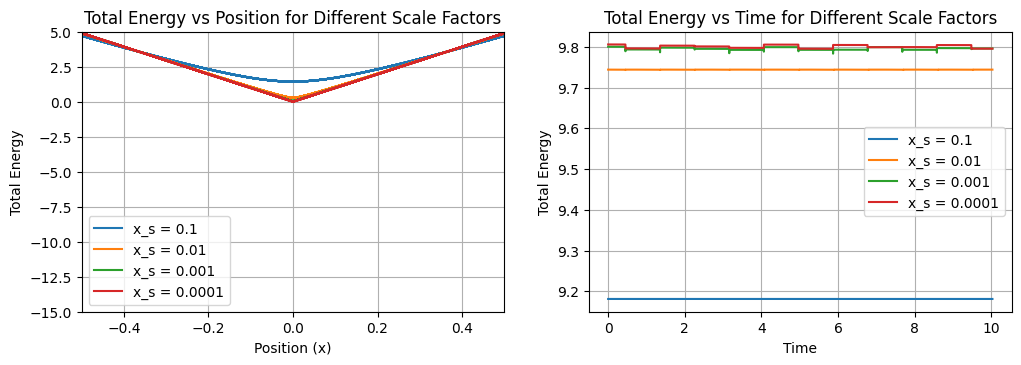

In [17]:
orbits = 5
x0 = 1
v0 = 0
T = 2 * np.pi * np.sqrt(x0/const.g)  # Time Orbit

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def total_energy(x, v, x_s):
    potential = -const.g / np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))
    kinetic = 0.5 * v**2
    return kinetic + potential

def system(t, y, x_s):
    x, v = y
    return [v, force(x, x_s)]

def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    dt = 1e-3
    
    x = np.zeros(h)
    v = np.zeros(h)
    energy = np.zeros(h)
    x[0] = x0
    v[0] = v0
    energy[0] = total_energy(x[0], v[0], x_s)
    
    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)
        energy[i+1] = total_energy(x[i+1], v[i+1], x_s)
    
    return t, x, v, energy

# Define the scale factors
x_s_values = [0.1, 0.01, 0.001, 0.0001]

# Create the plot
plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
for x_s in x_s_values:
    # Calculate the total energy (assuming v=0 for simplicity)
    energy = total_energy(x, 0, x_s)
    
    # Plot the energy
    plt.plot(x, energy, label=f'x_s = {x_s}')

plt.xlabel('Position (x)')
plt.ylabel('Total Energy')
plt.title('Total Energy vs Position for Different Scale Factors')
plt.legend()
plt.grid(True)
plt.xlim(-0.5, 0.5)
plt.ylim(-15, 5)

plt.subplot(2, 2, 2)
for x_s in x_s_values:
    t, x, v, energy = numerical_solution(x0, v0, x_s, dt, T, orbits)
    plt.plot(t, energy, label=f'x_s = {x_s}')

plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.title('Total Energy vs Time for Different Scale Factors')
plt.legend()
plt.grid(True)

# Proper Analytic

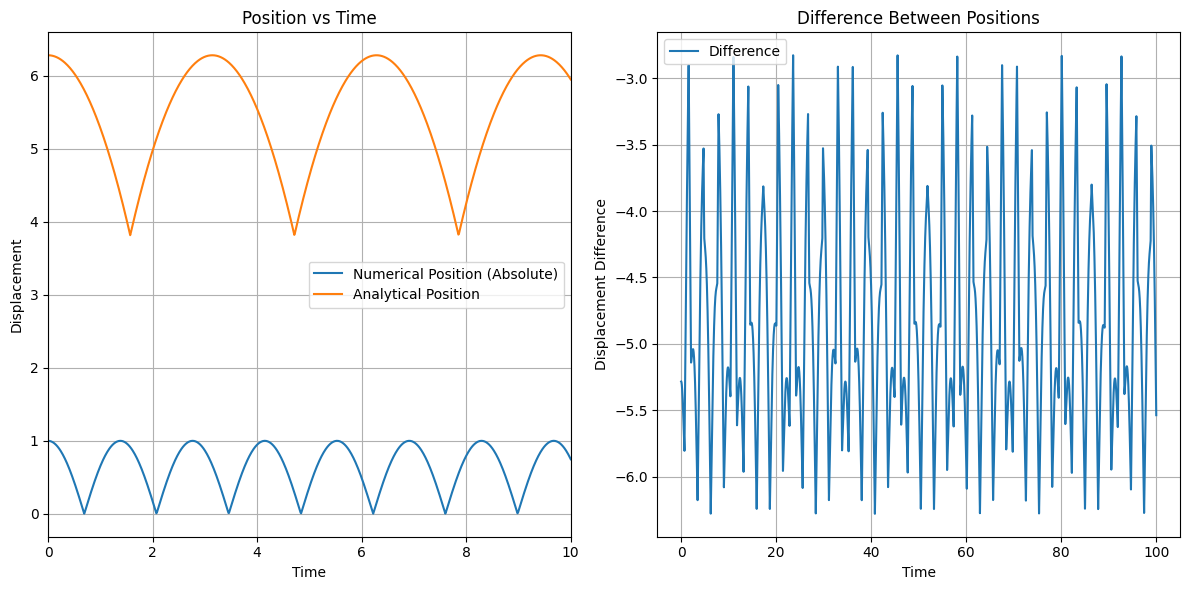

In [18]:
N = 10000
t = np.linspace(0,100,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0
x_s = 1


def analytic(t):
    v = -(2 * np.cos(t) * np.arcsin(np.sin(t)))/(np.sqrt(1-np.sin(t)**2))
    x = (2 * np.pi - np.arcsin(np.sin(t))**2)
    #x = (x - np.min(x)) / (np.max(x) - np.min(x))  # Normalize x
    #v = (v - np.min(v)) / (np.max(v) - np.min(v))  # Normalize v
    return x,v

def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)

def numeric(x0, v0, x_s, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return x,v

x_numeric, v_numeric = numeric(x0, v0, x_s, dt, N)
x_analytic, v_analytic = analytic(t)

#Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, np.abs(x_numeric), label='Numerical Position (Absolute)')
plt.plot(t, x_analytic, label='Analytical Position')
plt.xlabel('Time')
plt.xlim(0,10)
plt.ylabel('Displacement')
plt.title('Position vs Time')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, np.abs(x_numeric) - x_analytic, label='Difference')
plt.xlabel('Time')
plt.ylabel('Displacement Difference')
plt.title('Difference Between Positions')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


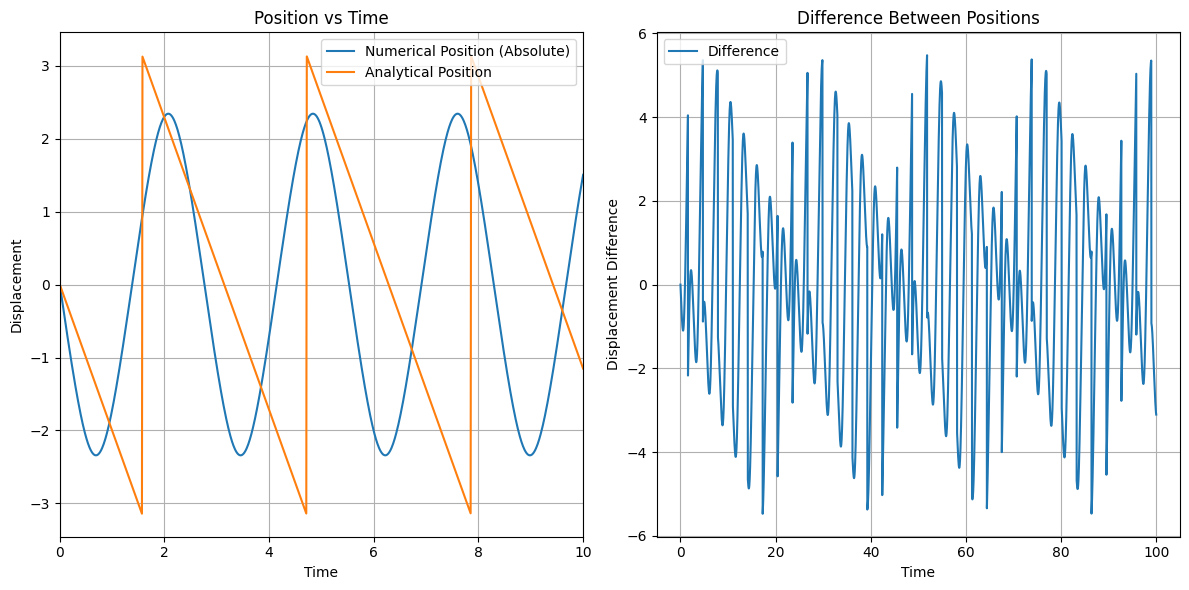

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, v_numeric, label='Numerical Position (Absolute)')
plt.plot(t, v_analytic, label='Analytical Position')
plt.xlabel('Time')
plt.xlim(0,10)
plt.ylabel('Displacement')
plt.title('Position vs Time')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, v_numeric - v_analytic, label='Difference')
plt.xlabel('Time')
plt.ylabel('Displacement Difference')
plt.title('Difference Between Positions')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Variable Step Size

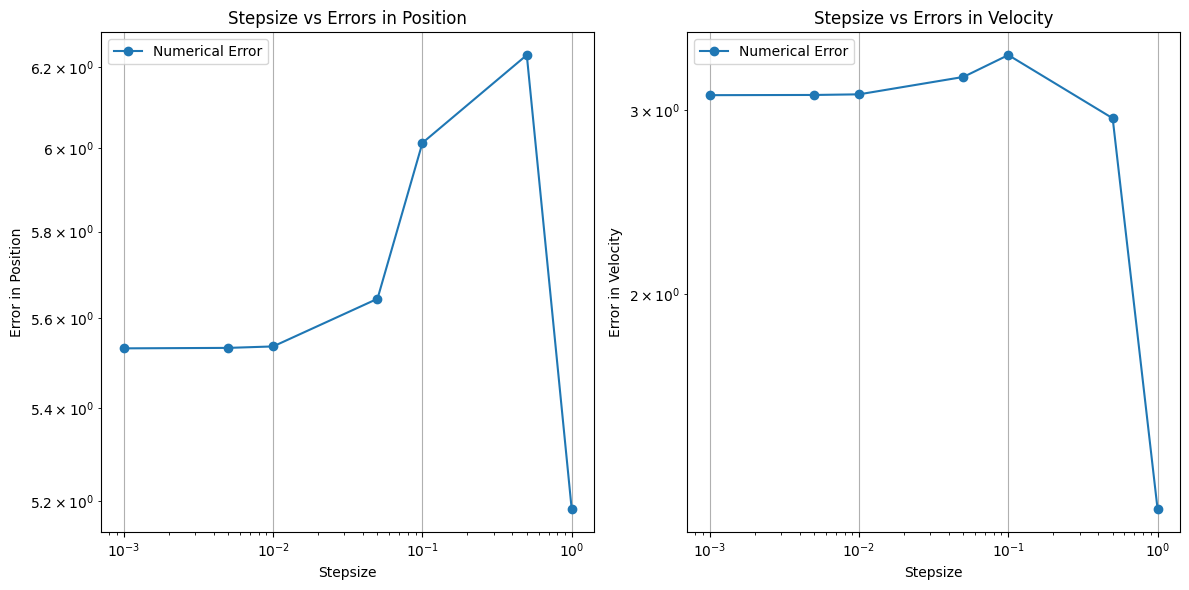

In [20]:
x0 = 1
v0 = 0
x_s = 1
t_final = 100

def analytic(t):
    v = -(2 * np.cos(t) * np.arcsin(np.sin(t)))/(np.sqrt(1-np.sin(t)**2))
    x = (2 * np.pi - np.arcsin(np.sin(t))**2)
    # x = (x - np.min(x)) / (np.max(x) - np.min(x))  # Normalize x
    # v = (v - np.min(v)) / (np.max(v) - np.min(v))  # Normalize v
    return x, v

def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)

def numeric(x0, v0, x_s, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range(N-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)

    return x, v

stepsizes = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
errors_position = []
errors_velocity = []

for h in stepsizes:
    N = int(t_final / h) + 1
    t = np.linspace(0, t_final, N)
    dt = t[1] - t[0]
    
    x_analytic, v_analytic = analytic(t)
    x_numeric, v_numeric = numeric(x0, v0, x_s, dt, N)

    error_x = np.abs(x_numeric - x_analytic)[-1]
    error_v = np.abs(v_numeric - v_analytic)[-1]
    errors_position.append(error_x)
    errors_velocity.append(error_v)

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(stepsizes, errors_position, label = 'Numerical Error', marker = 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Stepsize")
plt.ylabel('Error in Position')
plt.title('Stepsize vs Errors in Position')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(stepsizes, errors_velocity, label = 'Numerical Error', marker = 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Stepsize")
plt.ylabel('Error in Velocity')
plt.title('Stepsize vs Errors in Velocity')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()